In [6]:
import numpy as np
import os

def average_data(L, T, dt, p, d, shot, time_slice):
    # Ensure the save directory exists, create it if it doesn't
    save_dir = '/Users/uditvarma/Documents/s3_data/mean_hcrn'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    S_list = []
    for sss in range(1, shot+1):
        tag = f"/Users/uditvarma/Documents/s3_data/data_hcrn/L{L},T{T},dt{dt:.1f},p{p},dir{d},s{sss}_hc.npy"
        if os.path.isfile(tag):
            S = np.load(tag)
            S_list.append(S)
    
    S_list = np.array(S_list)
    S_mean = []
    S_var = []
    
    for i in range(time_slice):
        S_mean.append(np.mean(S_list[:, i]))
        S_var.append(np.var(S_list[:, i]))
    
    # Save the resulting arrays to the designated folder
    np.save(os.path.join(save_dir, f"Emean_L{L},T{T},dt{dt},p{p}_hc.npy"), S_mean)
    np.save(os.path.join(save_dir, f"Evar_L{L},T{T},dt{dt},p{p}_hc.npy"), S_var)

In [7]:
for L in [8]:
    for T in [10.0*L]:
        for p in [0.0, 0.01, 0.1]:
            for d in ["Z2"]:
                for dt in[1.0]:
                    average_data(L,T,dt,p,d,200,10*L)

In [8]:
import os
import re
import shutil

# Base directory containing your .npy files
base_dir = '/Users/uditvarma/Documents/s3_data/mean_hcrn'

# Pattern to extract L from filenames like: Emean_L8,T300,dt1.0,p0.4.npy
pattern = re.compile(r'^[^_]+_L(\d+),T.*\.npy$')

# List all files
all_files = os.listdir(base_dir)

# Loop through files
for fname in all_files:
    match = pattern.match(fname)
    if match:
        L = match.group(1)  # e.g., "8", "12", ...
        L_dir = os.path.join(base_dir, f'L_{L}')
        os.makedirs(L_dir, exist_ok=True)

        src = os.path.join(base_dir, fname)
        dst = os.path.join(L_dir, fname)
        shutil.move(src, dst)
        print(f"Moved {fname} → {L_dir}")

Moved Evar_L8,T80.0,dt1.0,p0.0_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8
Moved Evar_L8,T80.0,dt1.0,p0.01_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8
Moved Emean_L8,T80.0,dt1.0,p0.0_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8
Moved Evar_L8,T80.0,dt1.0,p0.1_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8
Moved Emean_L8,T80.0,dt1.0,p0.1_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8
Moved Emean_L8,T80.0,dt1.0,p0.01_hc.npy → /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8


In [9]:
import os
import shutil

# Base directory containing L_x folders
base_dir = '/Users/uditvarma/Documents/s3_data/mean_hcrn'

# List of L values
L_list = [6, 7, 8, 9, 10, 11]

for L in L_list:
    folder_name = f'L_{L}'
    source_dir = os.path.join(base_dir, folder_name)
    target_dir = os.path.join(source_dir, 'var')

    # Skip if the source directory doesn't exist
    if not os.path.isdir(source_dir):
        print(f"Skipping missing folder: {source_dir}")
        continue

    # Create 'var' subfolder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move files starting with "Evar"
    for filename in os.listdir(source_dir):
        if filename.startswith('Evar'):
            src_path = os.path.join(source_dir, filename)
            dst_path = os.path.join(target_dir, filename)
            shutil.move(src_path, dst_path)
            print(f"Moved {filename} to {target_dir}")

Skipping missing folder: /Users/uditvarma/Documents/s3_data/mean_hcrn/L_6
Skipping missing folder: /Users/uditvarma/Documents/s3_data/mean_hcrn/L_7
Moved Evar_L8,T80.0,dt1.0,p0.0_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8/var
Moved Evar_L8,T80.0,dt1.0,p0.01_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8/var
Moved Evar_L8,T80.0,dt1.0,p0.1_hc.npy to /Users/uditvarma/Documents/s3_data/mean_hcrn/L_8/var
Skipping missing folder: /Users/uditvarma/Documents/s3_data/mean_hcrn/L_9
Skipping missing folder: /Users/uditvarma/Documents/s3_data/mean_hcrn/L_10
Skipping missing folder: /Users/uditvarma/Documents/s3_data/mean_hcrn/L_11


In [35]:
import numpy as np
import os

# Base directory where your files are located
base_dir = '/Users/uditvarma/Documents/s3_data/mean_hcn'

# List of L values you want to process
L_values = [5, 6, 7, 8, 9]

# Loop through each L value
for L in L_values:
    # Create the directory path dynamically based on L
    data_dir = os.path.join(base_dir, f'L_{L}')

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory for L={L} not found: {data_dir}")
        continue

    # Get all .npy files in the directory and sort them
    file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

    # Initialize a list to hold the first data points
    last_data_points = []

    # Loop through the files and collect the first data point
    for file_name in file_list:
        data = np.load(os.path.join(data_dir, file_name))
        last_data_points.append(data[-1])  # Collect first data point

    # Convert to NumPy array and save
    last_data_array = np.array(last_data_points)
    output_file = os.path.join(base_dir, f'timeT_points_L{L}.npy')
    np.save(output_file, last_data_array)

    print(f"Data for L={L} saved to: {output_file}")

Directory for L=5 not found: /Users/uditvarma/Documents/s3_data/mean_hcn/L_5
Data for L=6 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L6.npy
Data for L=7 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L7.npy
Data for L=8 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L8.npy
Data for L=9 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L9.npy


The following result is with the initial state as a Bell pair:
\begin{equation*}
    |\psi(t=0)\rangle = |\uparrow \downarrow \dots \rangle |\Uparrow\rangle + |\downarrow \uparrow \dots\rangle |\Downarrow\rangle
\end{equation*}

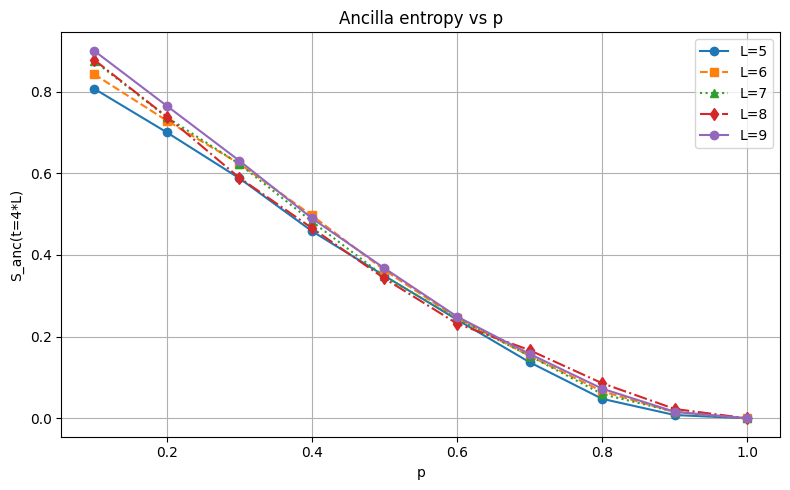

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Ancilla entropy vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=4*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

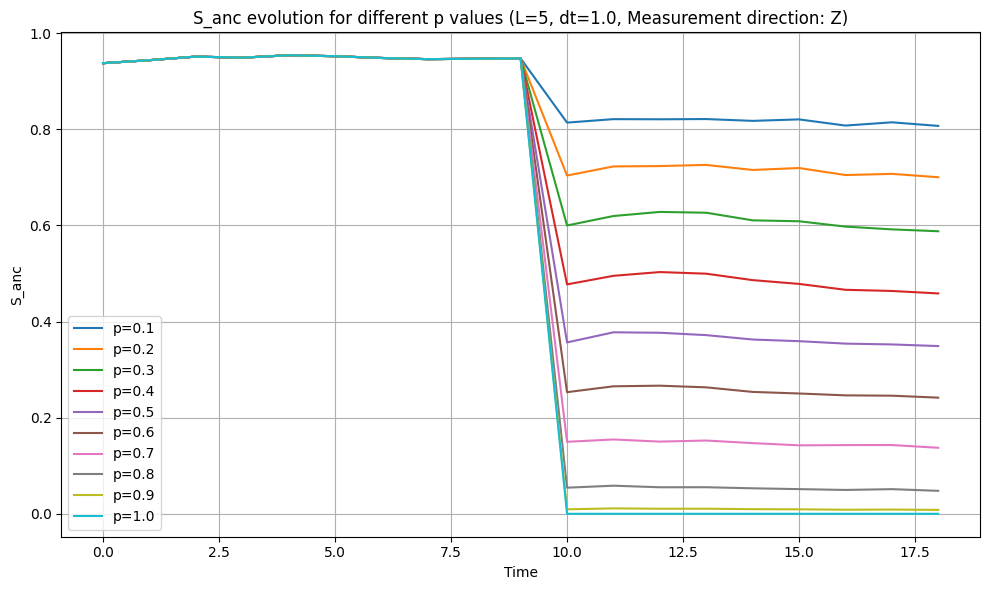

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_5_vs_t_z.svg')
plt.show()


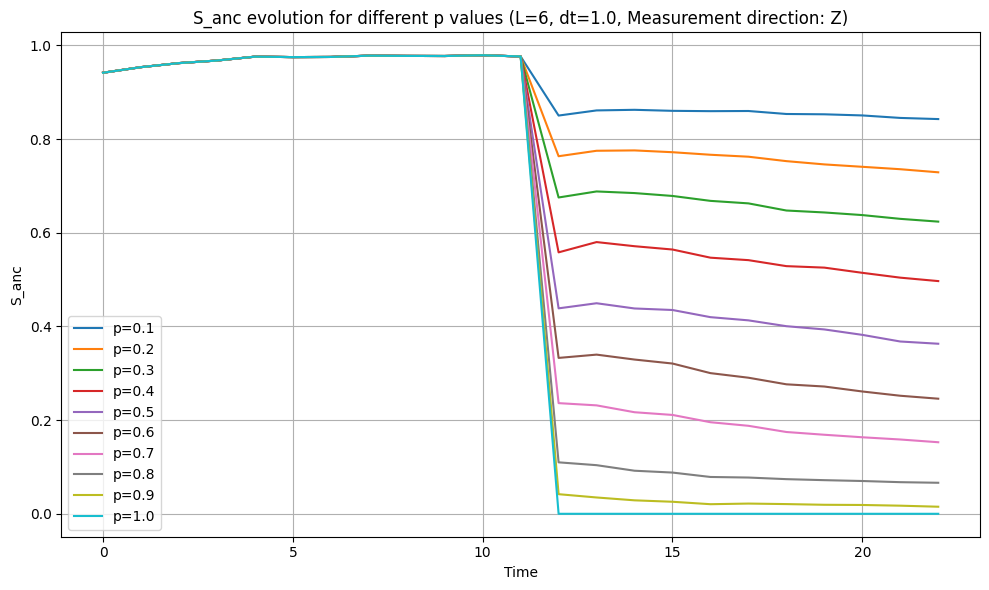

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t_z.svg')
plt.show()


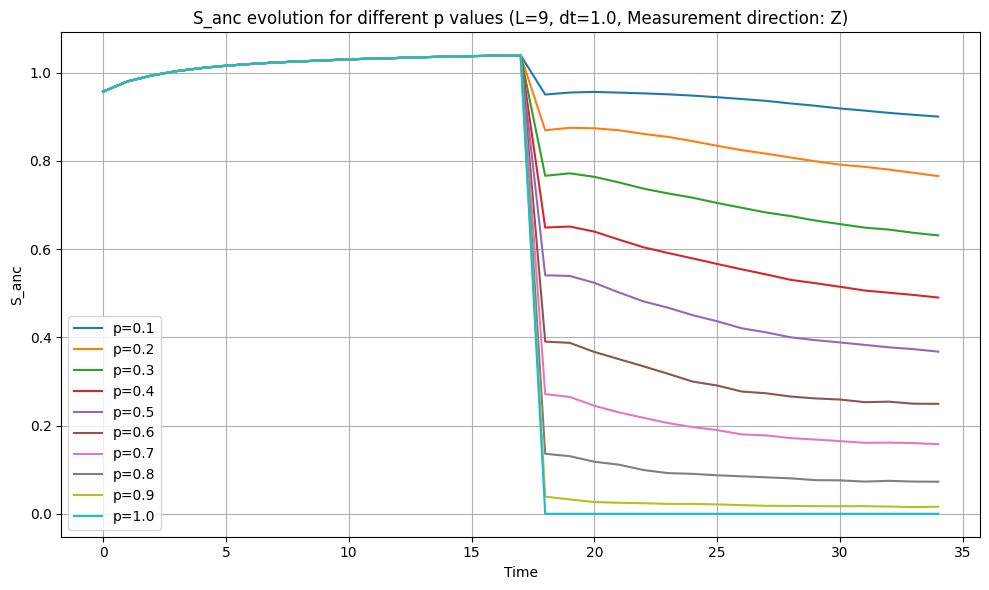

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/19 Aug 2025/mean_anc/L_9"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=9, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_9_vs_t_z.svg')
plt.show()

The following result is with the initial state as a Bell pair:
\begin{equation*}
    |\psi(t=0)\rangle = |\uparrow \downarrow \dots \rangle |\Uparrow\rangle + |00 \dots\rangle |0\rangle + |\downarrow \uparrow \dots\rangle |\Downarrow\rangle
\end{equation*}

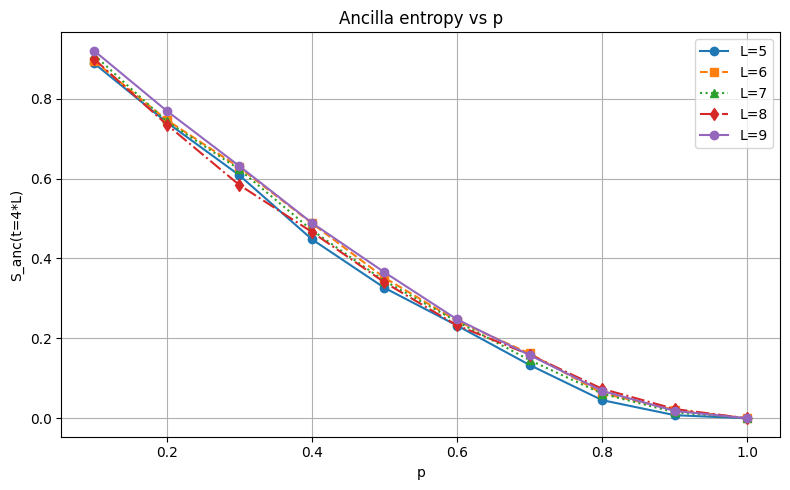

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Ancilla entropy vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=4*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T_vs_p_s3_ghz.svg')
# plt.savefig('I3T_p_Z.png')

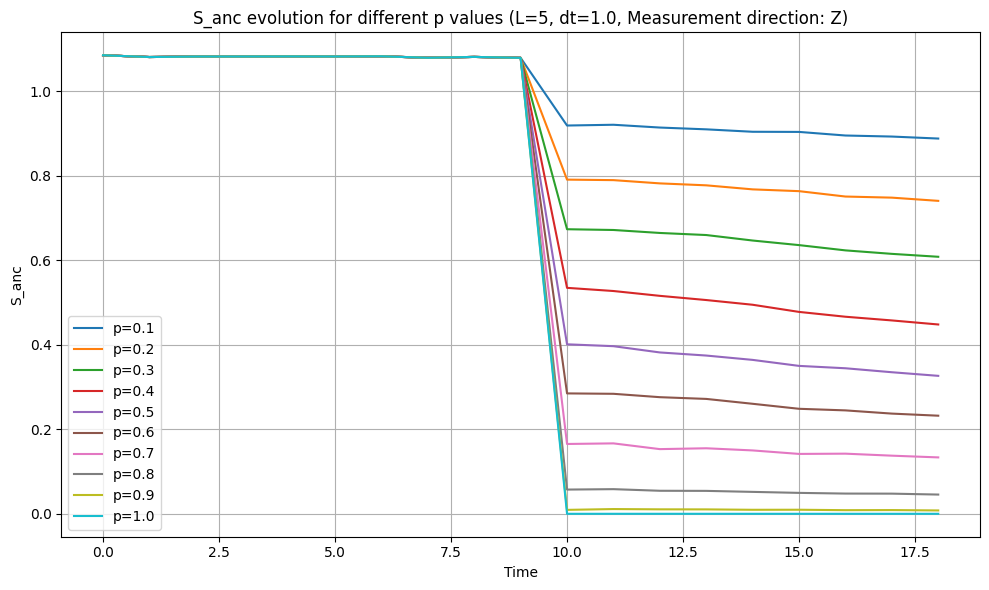

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_5_vs_t_z_ghz.svg')
plt.show()


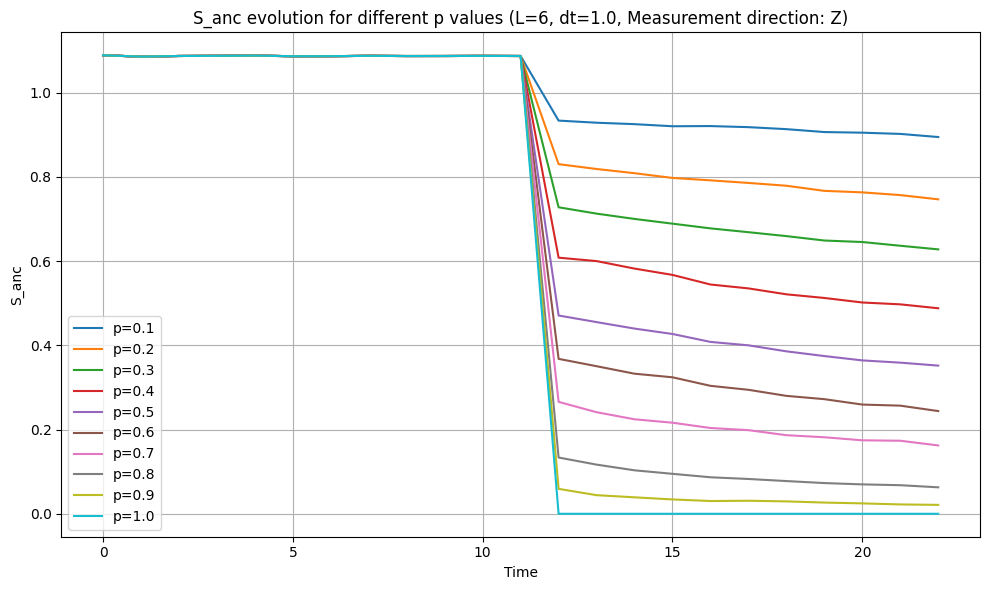

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t_z_ghz.svg')
plt.show()


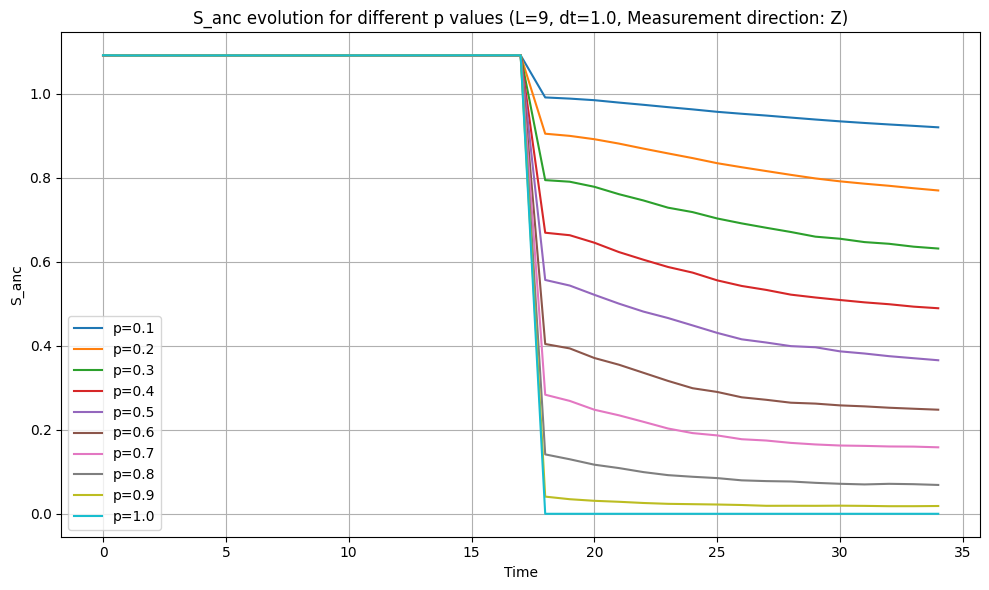

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_9"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=9, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_9_vs_t_z_ghz.svg')
plt.show()


Analysing the saturation of the ancilla entropies:

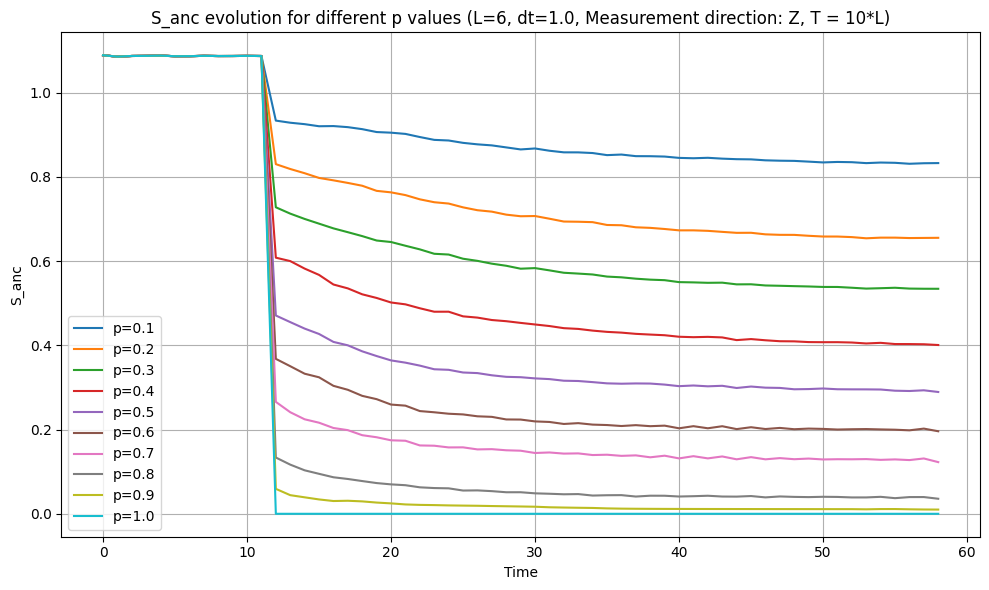

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"

pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z, T = 10*L)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_6_vs_t10L_z_ghz.svg')
plt.show()


Purification results for T=10*L

The following result is with the initial state as a Bell pair:
\begin{equation*}
    |\psi(t=0)\rangle = |\uparrow \downarrow \dots \rangle |\Uparrow\rangle + |00 \dots\rangle |0\rangle + |\downarrow \uparrow \dots\rangle |\Downarrow\rangle
\end{equation*}

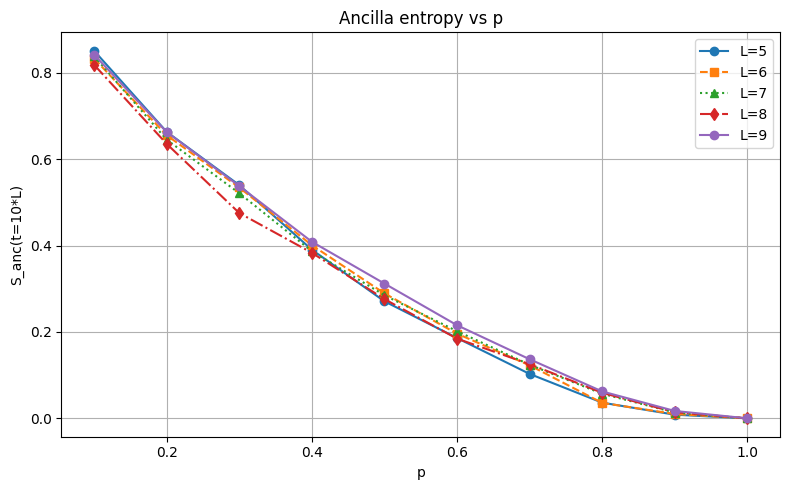

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8, 9]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Ancilla entropy vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T10L_vs_p_s3_ghz.svg')
# plt.savefig('I3T_p_Z.png')

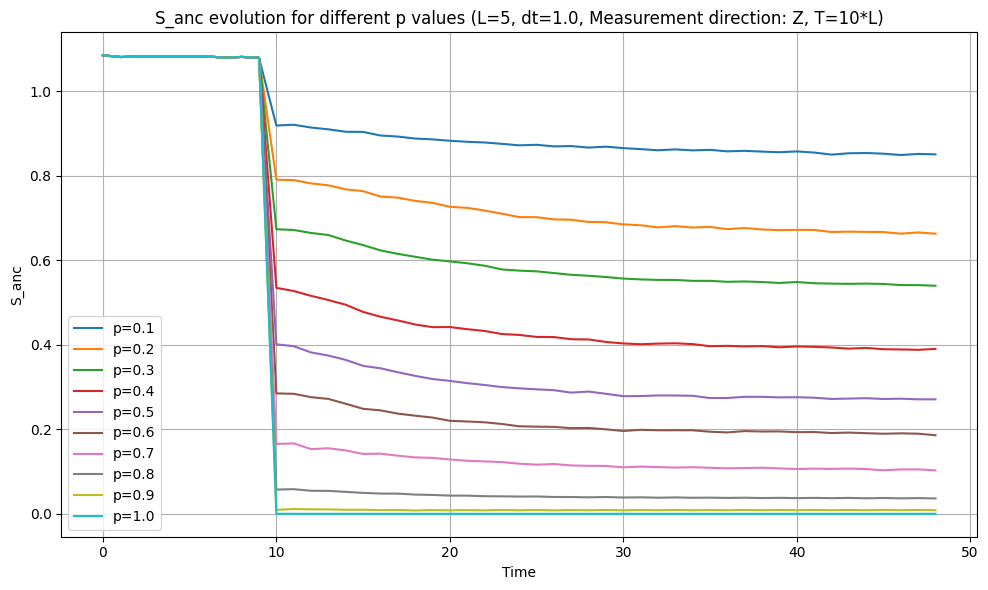

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z, T=10*L)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_5_vs_t10L_z_ghz.svg')
plt.show()


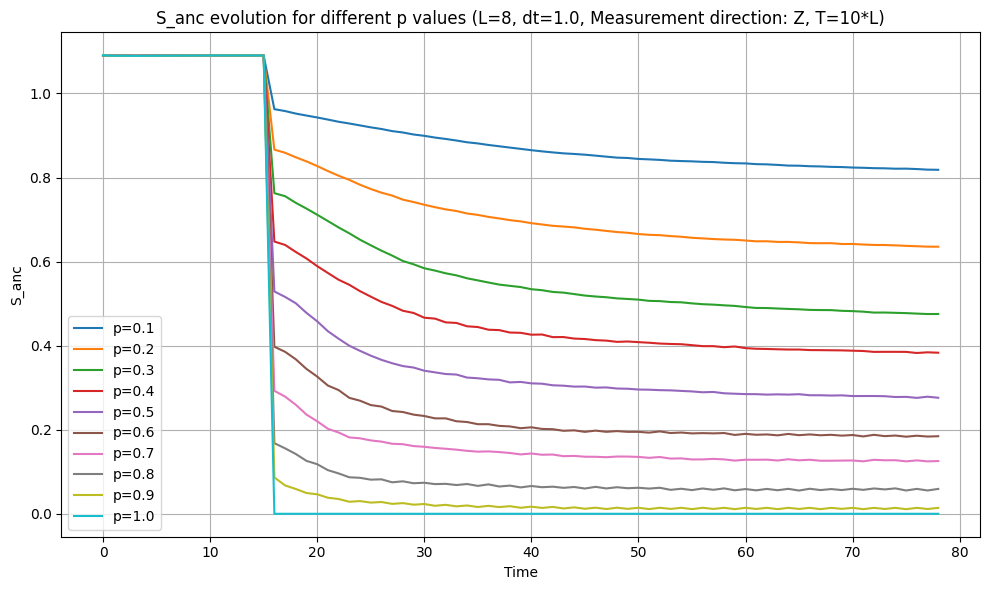

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_8"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('S_anc')         # or Y-axis meaning
plt.title('S_anc evolution for different p values (L=8, dt=1.0, Measurement direction: Z, T=10*L)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_anc_8_vs_t10L_z_ghz.svg')
plt.show()


### Analysing half-chain entropy dynamics

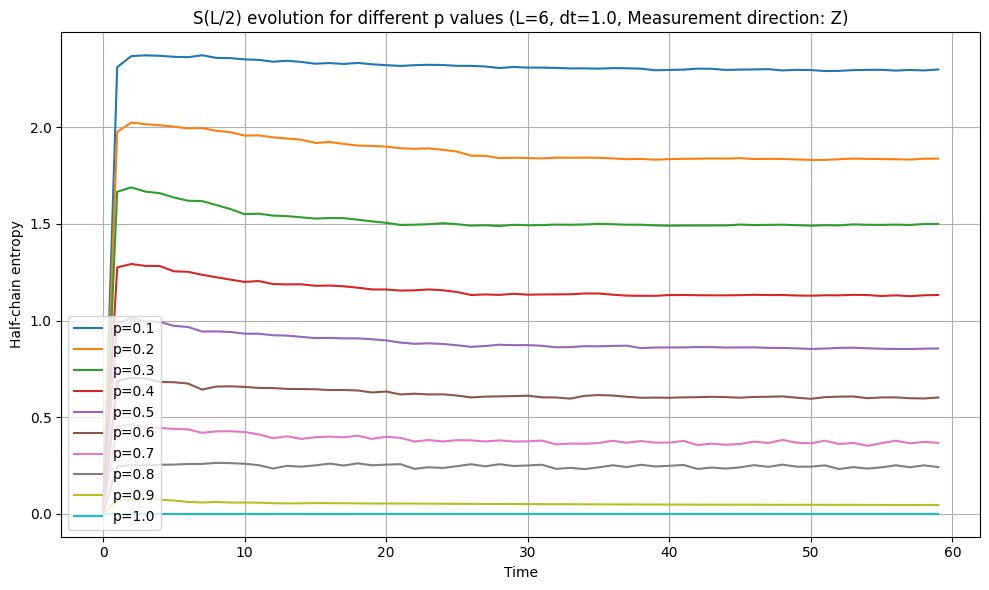

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_6_vs_t_z.svg')
plt.show()


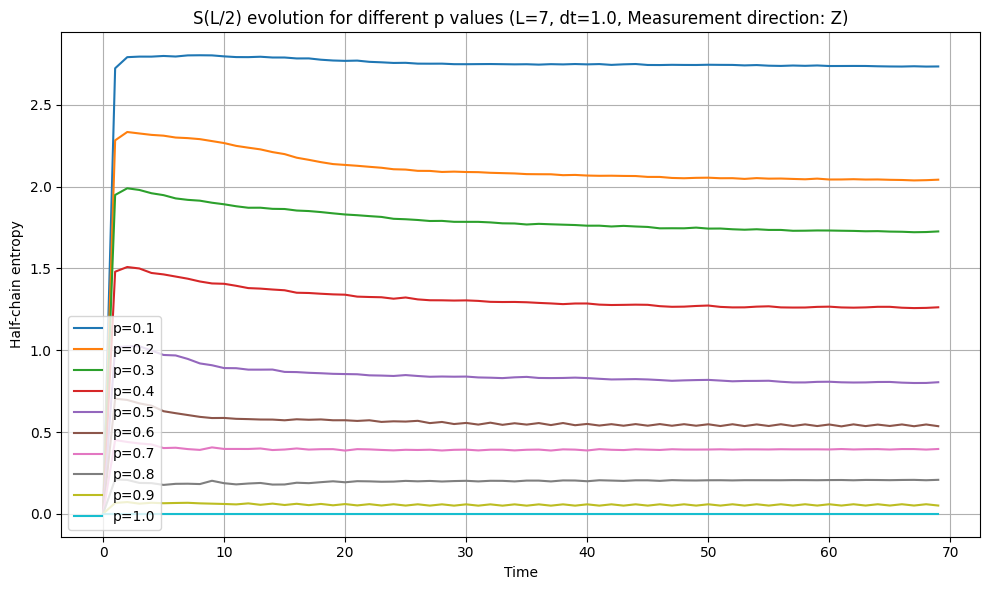

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_7"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=7, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_7_vs_t_z.svg')
plt.show()


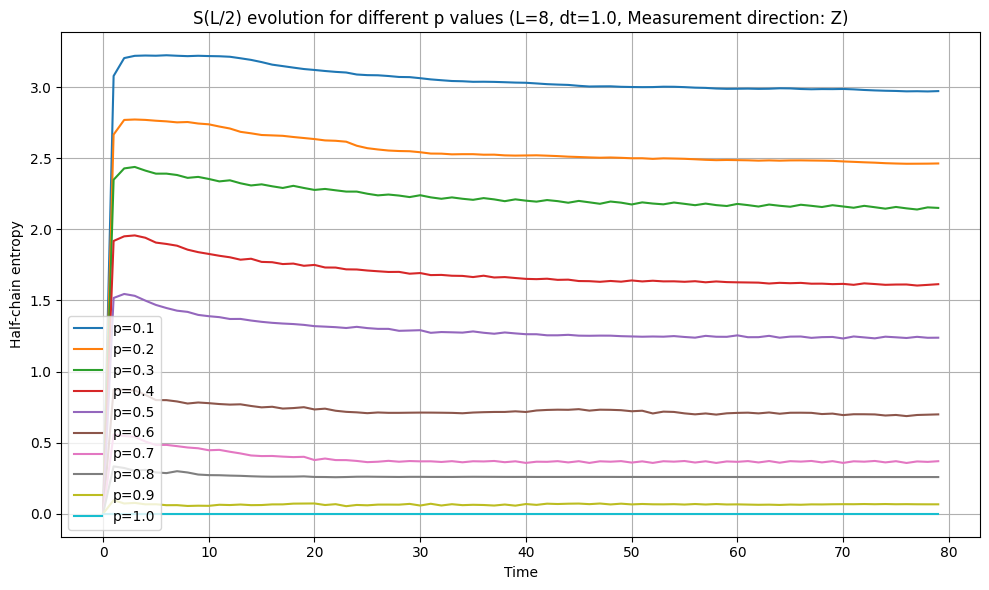

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_8"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_8_vs_t_z.svg')
plt.show()


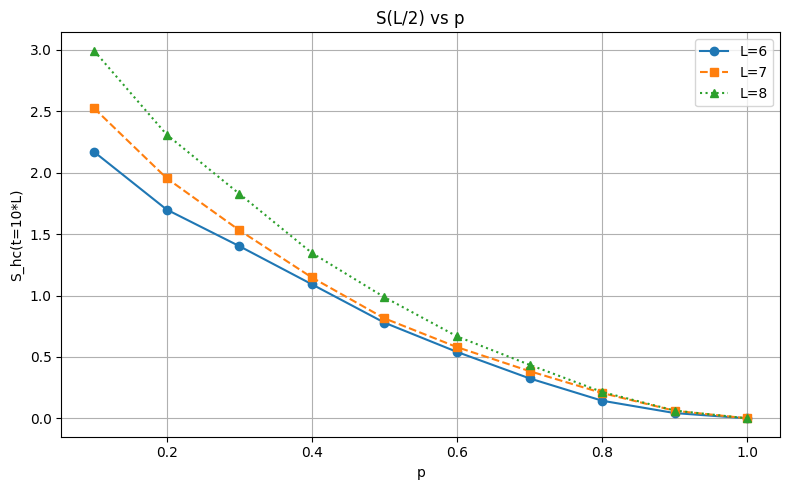

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [6, 7, 8]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('S(L/2) vs p')
plt.xlabel('p')
plt.ylabel('S_hc(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_hc_T10L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

### Half-chain entnaglement entropy evolution for 500 shots and T = 12 * L

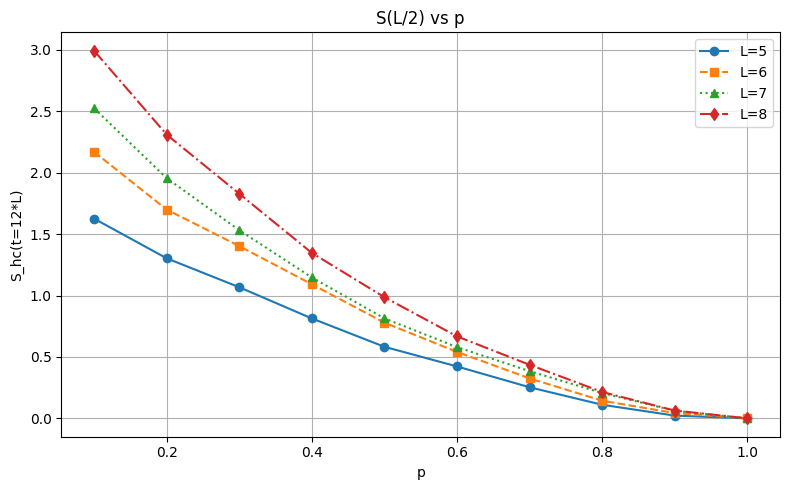

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('S(L/2) vs p')
plt.xlabel('p')
plt.ylabel('S_hc(t=12*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_hc_T12L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

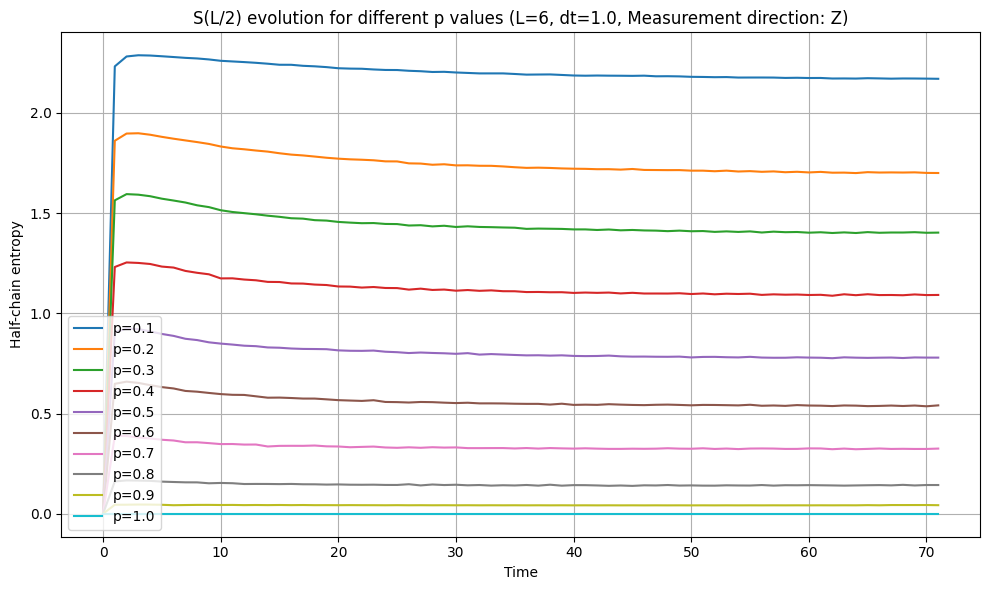

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=6, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_6_vs_t12L_z.svg')
plt.show()

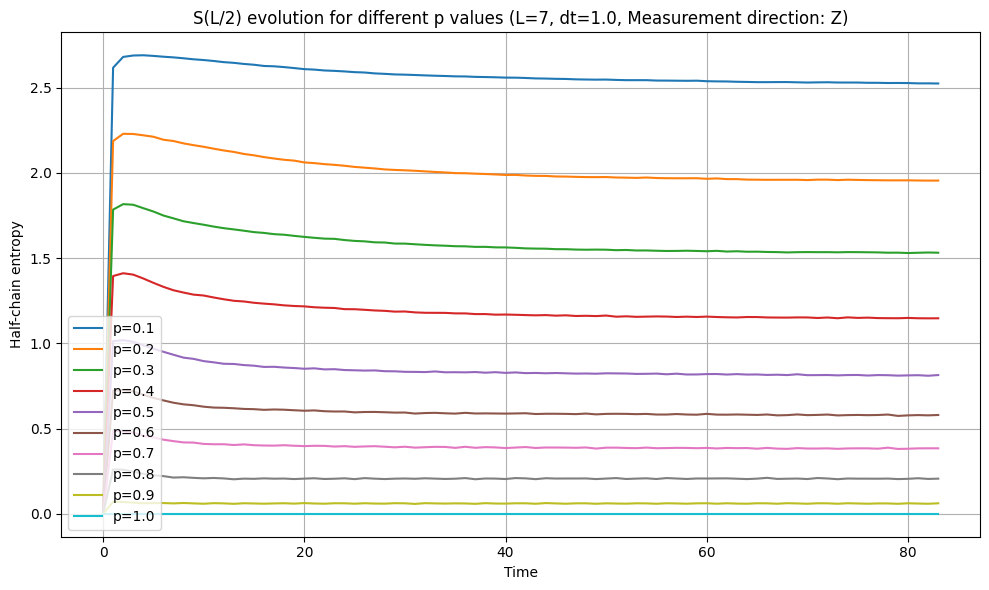

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_7"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=7, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_7_vs_t12L_z.svg')
plt.show()

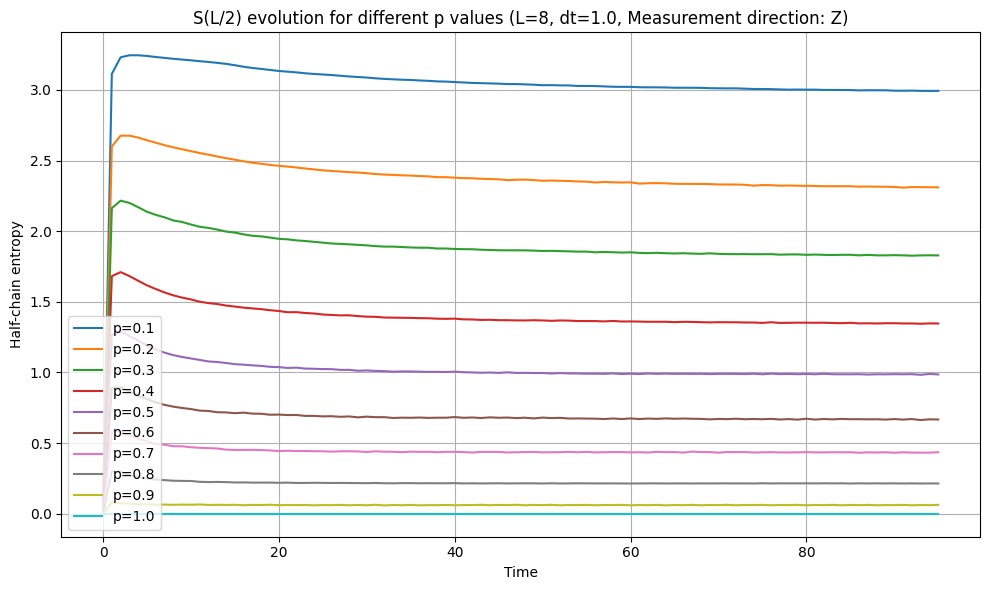

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_8"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

## Plotting the fluctuations of $S_{hc}$

In [39]:
import numpy as np
import os

# Base directory where your files are located
base_dir = '/Users/uditvarma/Documents/s3_data/mean_hcn'

# List of L values you want to process
L_values = [6, 7, 8, 9]

# Loop through each L value
for L in L_values:
    # Path to the "var" subdirectory inside each L folder
    data_dir = os.path.join(base_dir, f'L_{L}', 'var')

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Directory for L={L} not found: {data_dir}")
        continue

    # Get all .npy files in the "var" directory and sort them
    file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])

    # Initialize a list to hold the last data points
    last_data_points = []

    # Loop through the files and collect the last data point
    for file_name in file_list:
        file_path = os.path.join(data_dir, file_name)
        data = np.load(file_path)
        last_data_points.append(data[-1])  # Collect last data point

    # Convert to NumPy array and save
    last_data_array = np.array(last_data_points)
    output_file = os.path.join(base_dir, f'timeT_points_L_var{L}.npy')
    np.save(output_file, last_data_array)

    print(f"Data for L={L} saved to: {output_file}")

Data for L=6 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var6.npy
Data for L=7 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var7.npy
Data for L=8 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var8.npy
Data for L=9 saved to: /Users/uditvarma/Documents/s3_data/mean_hcn/timeT_points_L_var9.npy


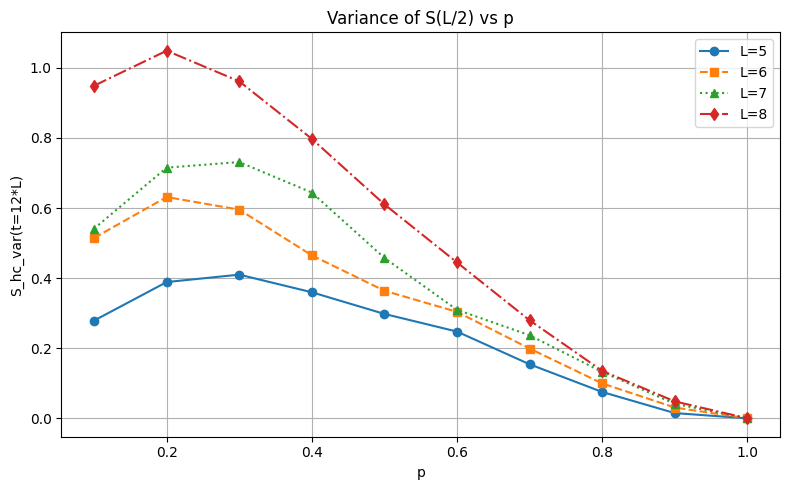

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7, 8]  # You can add more Ls here
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hc'
filename_template = 'timeT_points_L_var{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Variance of S(L/2) vs p')
plt.xlabel('p')
plt.ylabel('S_hc_var(t=12*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_hc_var_T12L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

### Analysing half-chain entropy for $(S^z)^2$ measurements

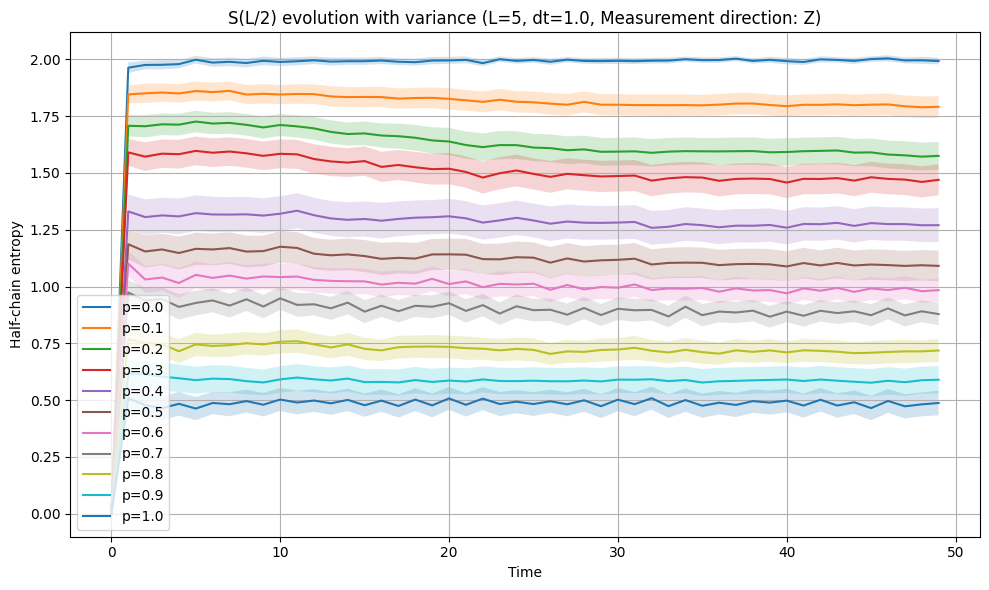

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(data_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var)/np.sqrt(50)

    t = np.arange(len(mean))  # time axis (assuming uniform steps)

    # plot mean line
    plt.plot(t, mean, label=f'p={p}')
    # shaded region = ± std
    plt.fill_between(t, mean-std, mean+std, alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_5_vs_t_var.svg')
plt.show()

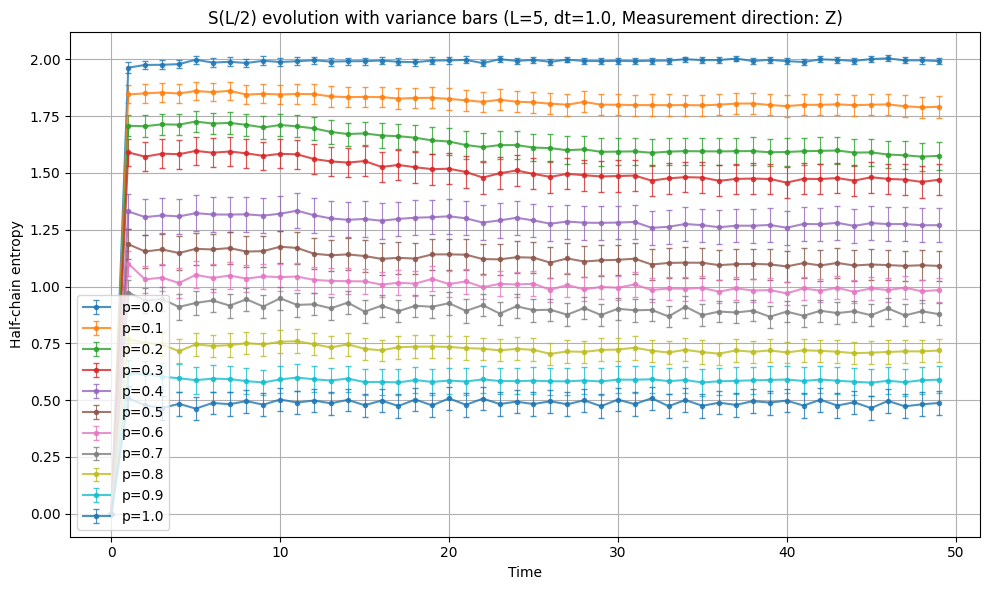

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_5"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L5")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(data_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var)/np.sqrt(50)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=5, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_5_vs_t_varbars.svg')
plt.show()


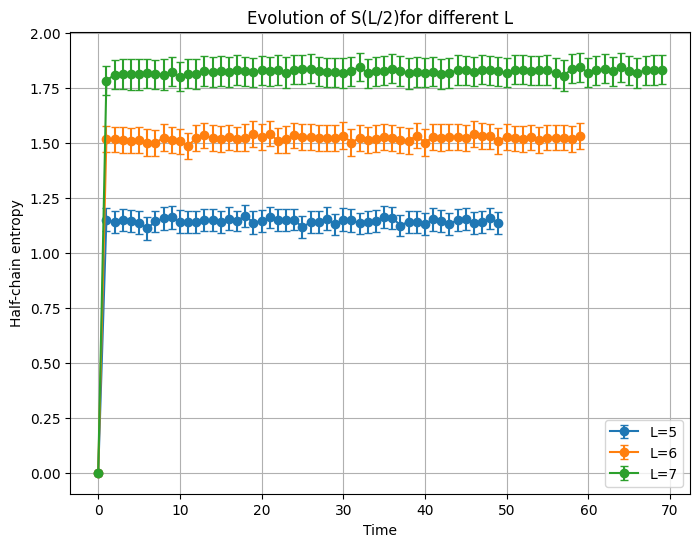

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import os

# Path to your folder
path = "/Users/uditvarma/Documents/s3_data/mean_hc/"

# Find all Emean and Evar files
mean_files = sorted(glob.glob(os.path.join(path, "Emean_*.npy")))
var_files  = sorted(glob.glob(os.path.join(path, "Evar_*.npy")))

# Regex to extract L
pattern = re.compile(r"L(\d+)")

plt.figure(figsize=(8,6))

for mfile in mean_files:
    # Matching variance file
    vfile = mfile.replace("Emean", "Evar")
    if not os.path.exists(vfile):
        continue
    
    # Extract L value
    L = int(pattern.search(mfile).group(1))

    # Load arrays
    mean = np.load(mfile)
    var  = np.load(vfile)
    err  = np.sqrt(var)/np.sqrt(50)  # Standard error

    # Plot with error bars
    x = np.arange(len(mean))
    plt.errorbar(x, mean, yerr=err, label=f"L={L}", capsize=3, marker='o', linestyle='-')

plt.xlabel("Time")
plt.ylabel("Half-chain entropy")
plt.title("Evolution of S(L/2)for different L")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('S_hc_vs_t_varbars_allL.svg')


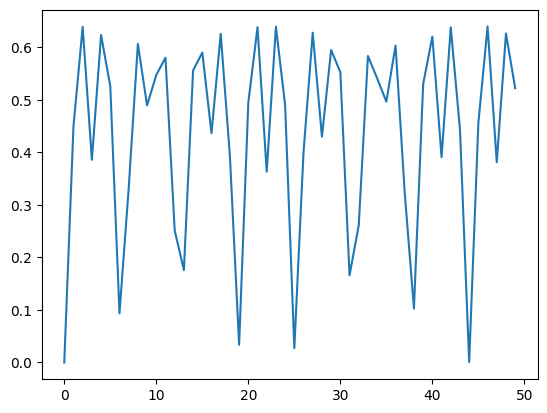

In [9]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L5,T50.0,dt1.0,p0.0_hc.npy")
plt.plot(data)

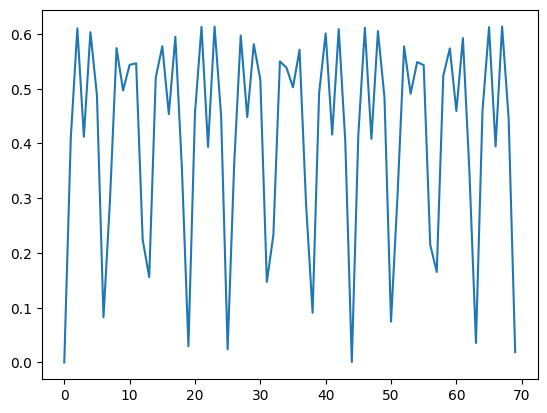

In [26]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L7,T70.0,dt1.0,p0.0_hc.npy")
plt.plot(data)

In [20]:
data

array([-1.77635684e-16,  4.10263818e-01,  6.10115457e-01,  4.12170063e-01,
        6.03190794e-01,  4.88073557e-01,  8.25440090e-02,  2.97428247e-01,
        5.74156083e-01,  4.96696072e-01,  5.43599793e-01,  5.46402921e-01,
        2.24120302e-01,  1.56125204e-01,  5.20309950e-01,  5.77517188e-01,
        4.53590937e-01,  5.94809635e-01,  3.55006564e-01,  2.95638488e-02,
        4.55228864e-01,  6.13027640e-01,  3.93693031e-01,  6.13430341e-01,
        4.50413480e-01,  2.39521635e-02,  3.62073540e-01,  5.97131835e-01,
        4.48098068e-01,  5.81299387e-01,  5.16701185e-01,  1.47106548e-01,
        2.33063190e-01,  5.49792031e-01,  5.38439659e-01,  5.02474961e-01,
        5.71062744e-01,  2.89184010e-01,  9.06910367e-02,  4.92088244e-01,
        6.00957512e-01,  4.16238948e-01,  6.08889629e-01,  4.04321930e-01,
        6.86666396e-04,  4.16060962e-01,  6.11168065e-01,  4.08397449e-01,
        6.05207267e-01,  4.83984189e-01,  7.45979399e-02,  3.05549142e-01,
        5.77184242e-01,  

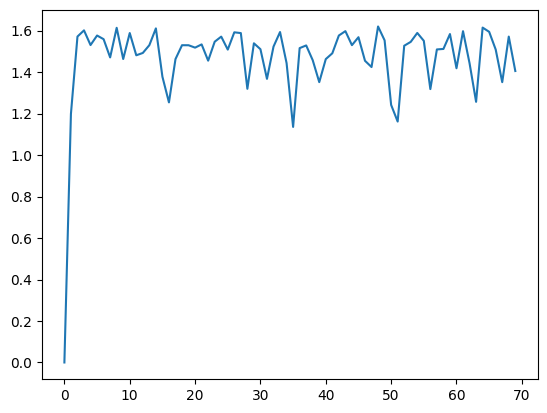

In [30]:
data1 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L7,T70.0,dt1.0,p0.0_hc.npy")
data2 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.0_hc.npy")
plt.plot(data1)
#plt.plot(data2)

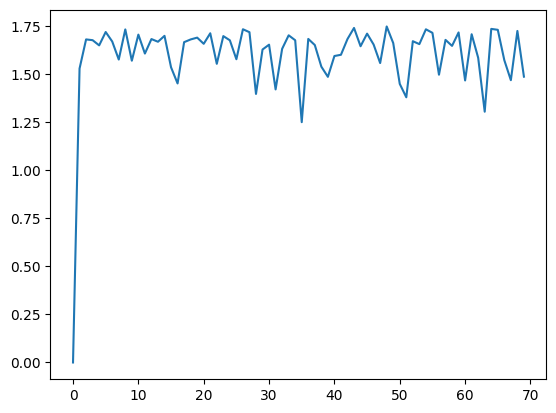

In [33]:
data1 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L7,T70.0,dt1.0,p0.0_hc.npy")
data2 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.0_hc.npy")
plt.plot(data1)
#plt.plot(data2)

In [ ]:
data1 

array([-1.77635684e-16,  4.10263818e-01,  6.10115457e-01,  4.12170063e-01,
        6.03190794e-01,  4.88073557e-01,  8.25440090e-02,  2.97428247e-01,
        5.74156083e-01,  4.96696072e-01,  5.43599793e-01,  5.46402921e-01,
        2.24120302e-01,  1.56125204e-01,  5.20309950e-01,  5.77517188e-01,
        4.53590937e-01,  5.94809635e-01,  3.55006564e-01,  2.95638488e-02,
        4.55228864e-01,  6.13027640e-01,  3.93693031e-01,  6.13430341e-01,
        4.50413480e-01,  2.39521635e-02,  3.62073540e-01,  5.97131835e-01,
        4.48098068e-01,  5.81299387e-01,  5.16701185e-01,  1.47106548e-01,
        2.33063190e-01,  5.49792031e-01,  5.38439659e-01,  5.02474961e-01,
        5.71062744e-01,  2.89184010e-01,  9.06910367e-02,  4.92088244e-01,
        6.00957512e-01,  4.16238948e-01,  6.08889629e-01,  4.04321930e-01,
        6.86666396e-04,  4.16060962e-01,  6.11168065e-01,  4.08397449e-01,
        6.05207267e-01,  4.83984189e-01,  7.45979399e-02,  3.05549142e-01,
        5.77184242e-01,  

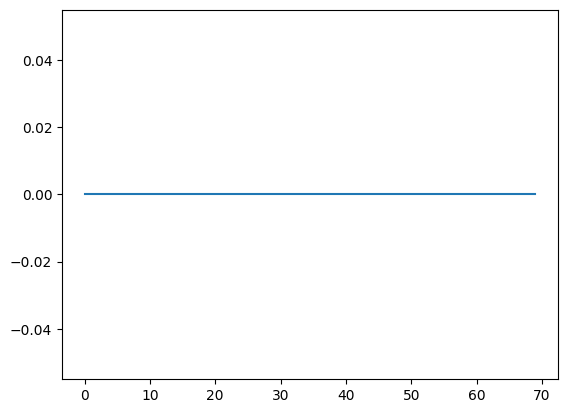

In [21]:
plt.plot(data-data1)

### Charge-sharpening dynamics

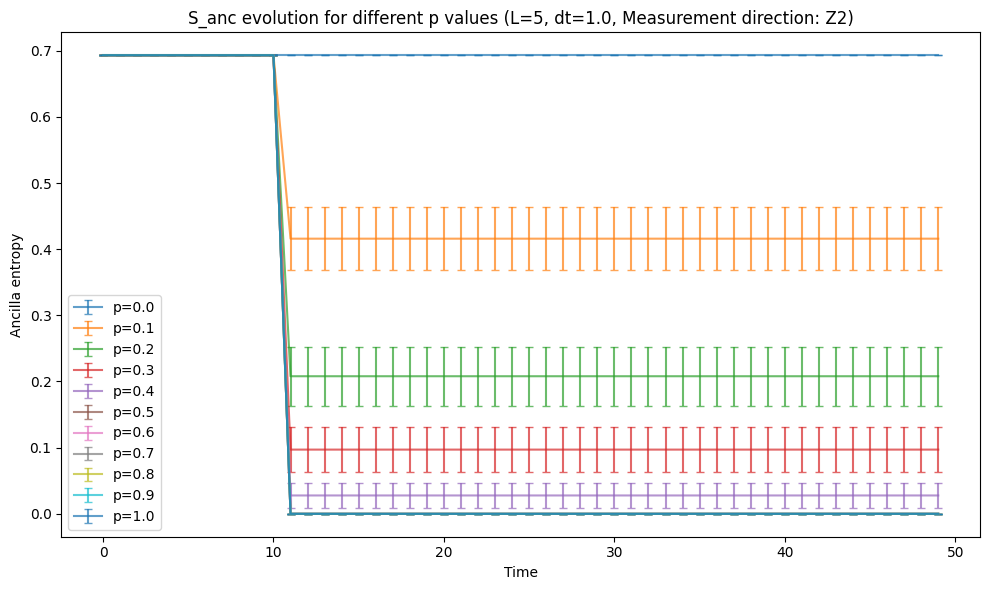

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_5"

# Parameters
T = 50
dt = 1.0
p_values = np.round(np.arange(0.0, 1.01, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L5,T{T},dt{dt},p{p}_hc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L5,T{T},dt{dt},p{p}_hc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=5, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_5_vs_t_z2.svg')
plt.show()


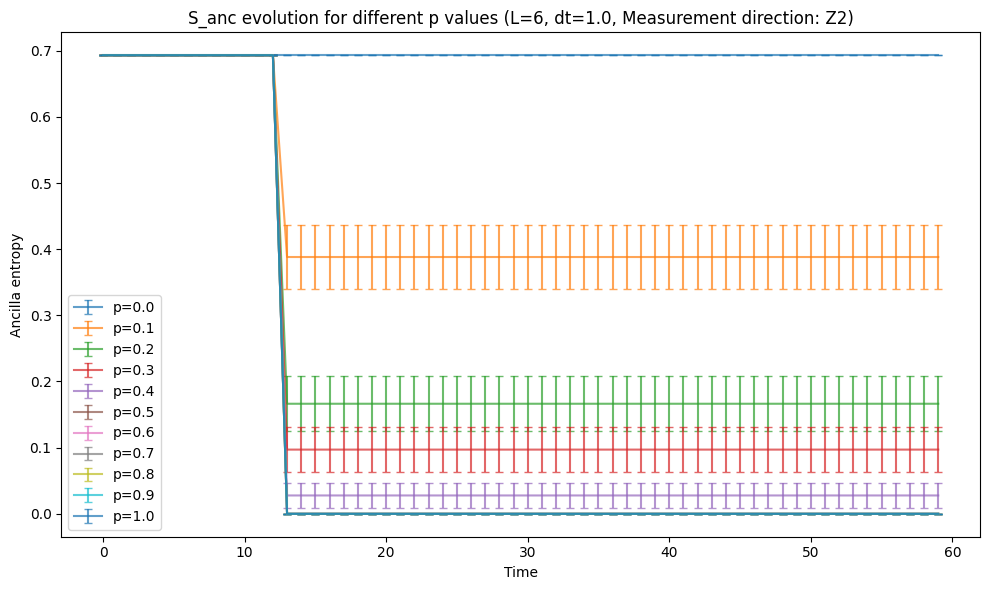

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"
L = 6
# Parameters
T = 10*L
dt = 1.0
p_values = np.round(np.arange(0.0, 1.01, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L6,T{T},dt{dt},p{p}_hc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L6,T{T},dt{dt},p{p}_hc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_6_vs_t_z2.svg')
plt.show()


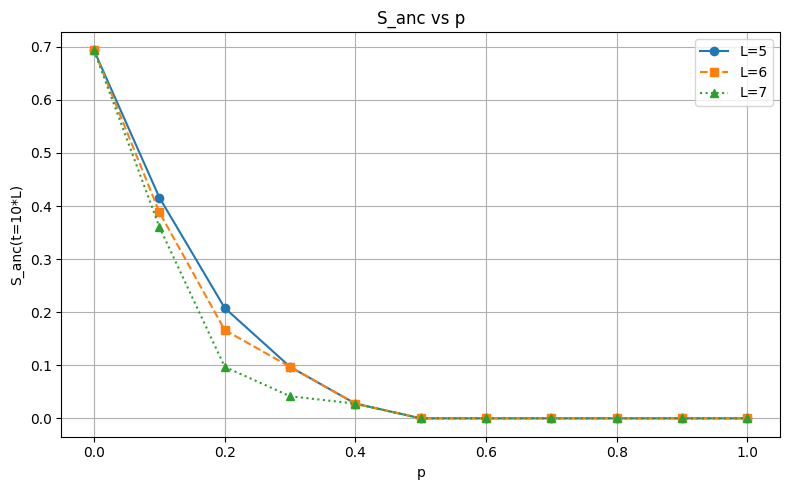

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7]  # You can add more Ls here
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_anc'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('S_anc vs p')
plt.xlabel('p')
plt.ylabel('S_anc(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_anc_T10L_vs_p_z2.svg')

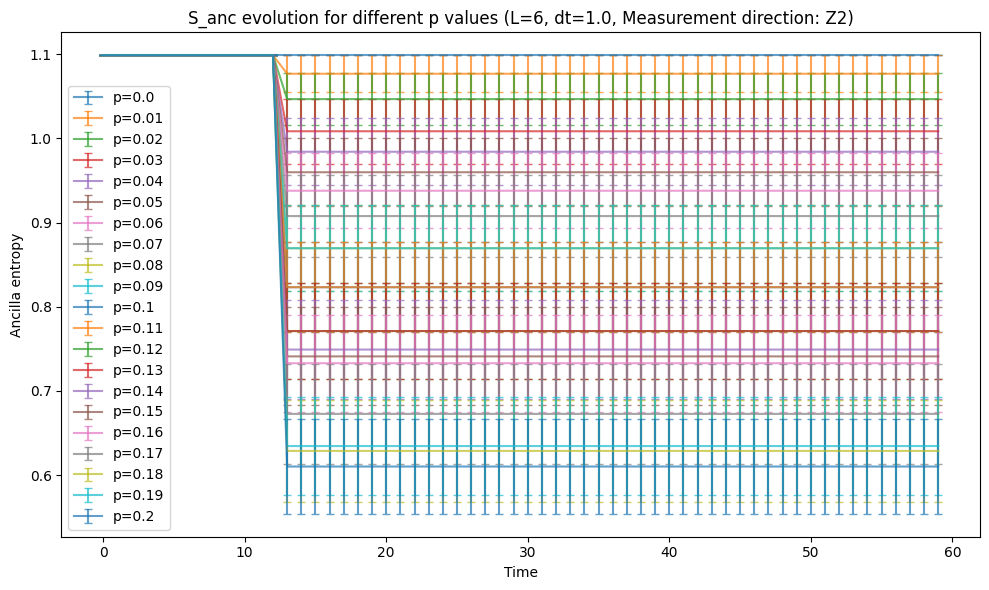

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"
L = 6
# Parameters
T = 10*L
dt = 1.0
p_values = np.round(np.arange(0.0, 0.21, 0.01), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L6,T{T},dt{dt},p{p}_anc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L6,T{T},dt{dt},p{p}_anc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
plt.savefig('S_ancghz_6_vs_t_z2.svg')
plt.show()


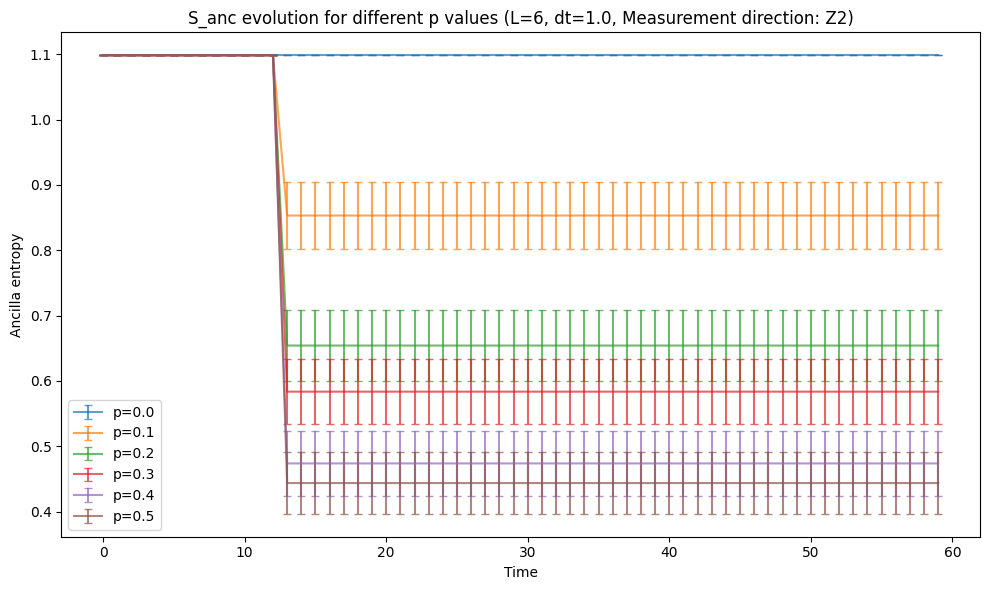

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_6"
L = 6
# Parameters
T = 10*L
dt = 1.0
p_values = np.round(np.arange(0.0, 0.6, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L6,T{T},dt{dt},p{p}_anc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L6,T{T},dt{dt},p{p}_anc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
plt.savefig('S_ancghz_6_vs_t_z2.svg')
plt.show()


In [50]:
np.load("/Users/uditvarma/Documents/s3_data/data_anc/L6,T60,dt1.0,p0.1,dirZ2,s45_anc.npy")

array([ 1.09861229e+00,  1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
        1.09861229e+00,  1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
        1.09861229e+00,  1.09861229e+00,  1.09861229e+00,  1.09861229e+00,
        1.09861229e+00, -8.88178420e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [28]:
data1

array([1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229])

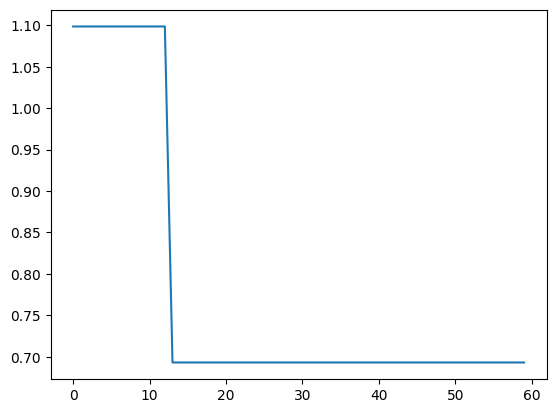

In [12]:
plt.plot(data1)

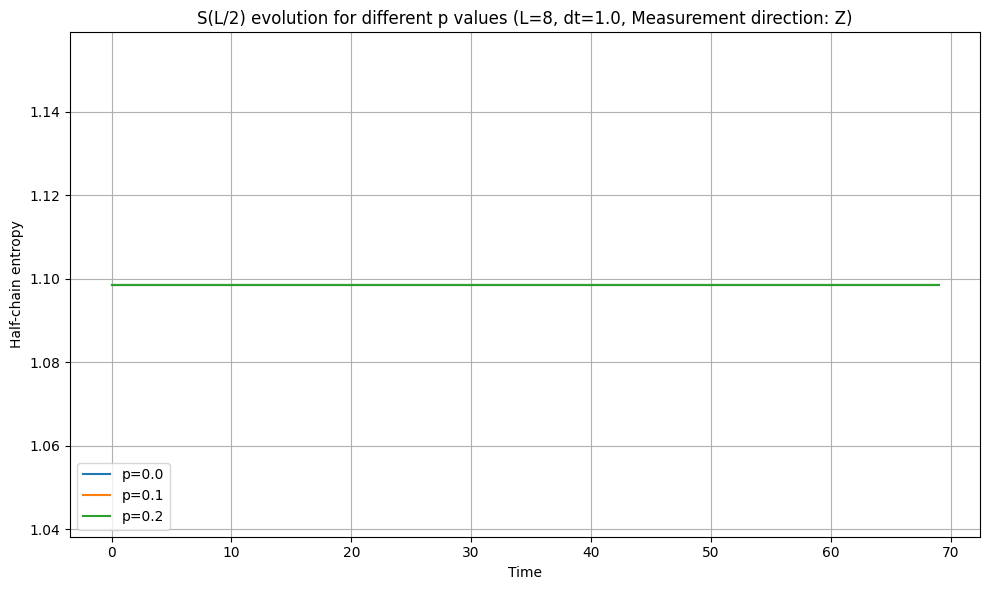

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_anc/L_7"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_anc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t_z.svg')
plt.show()


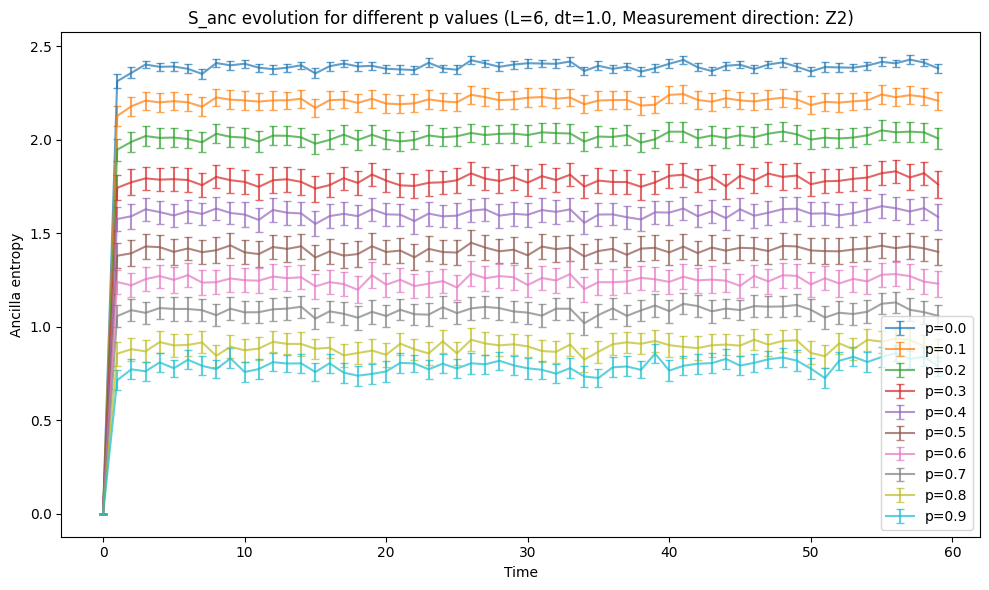

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_6"
L = 6
# Parameters
T = 10.0*L
dt = 1.0
p_values = np.round(np.arange(0.0, 1.0, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L6,T{T},dt{dt},p{p}_hc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L6,T{T},dt{dt},p{p}_hc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
#plt.savefig('S_ancghz_6_vs_t_z2.svg')
plt.show()


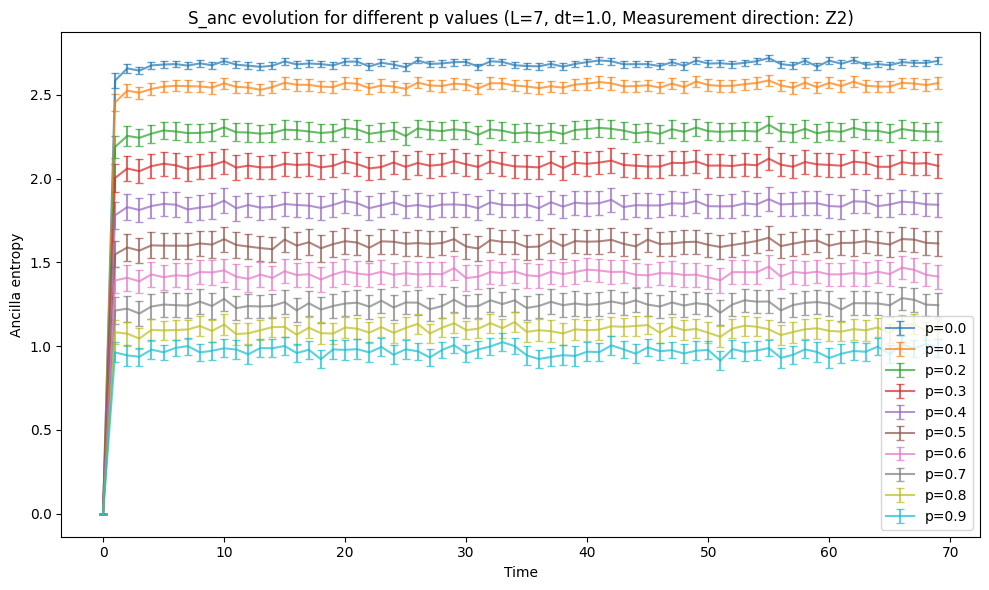

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Base directory
base_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_7"
L = 7
# Parameters
T = 10.0*L
dt = 1.0
p_values = np.round(np.arange(0.0, 1.0, 0.1), 2)  # p from 0.0 to 1.0

plt.figure(figsize=(10, 6))

for p in p_values:
    # File paths
    mean_file = os.path.join(base_dir, f"Emean_L7,T{T},dt{dt},p{p}_hc.npy")
    var_file = os.path.join(base_dir, "var", f"Evar_L7,T{T},dt{dt},p{p}_hc.npy")

    # Check files exist
    if os.path.exists(mean_file) and os.path.exists(var_file):
        mean_data = np.load(mean_file)
        var_data = np.load(var_file)
        std_data = np.sqrt(var_data)/np.sqrt(50)  # Standard error

        x = np.arange(len(mean_data))

        # Plot mean with error bars
        plt.errorbar(x, mean_data, yerr=std_data, label=f"p={p}", capsize=3, alpha=0.7)
    else:
        print(f"Missing files for p={p}")

plt.xlabel("Time")
plt.ylabel("Ancilla entropy")
plt.title("S_anc evolution for different p values (L=7, dt=1.0, Measurement direction: Z2)")
plt.legend()
plt.tight_layout()
#plt.savefig('S_ancghz_6_vs_t_z2.svg')
plt.show()


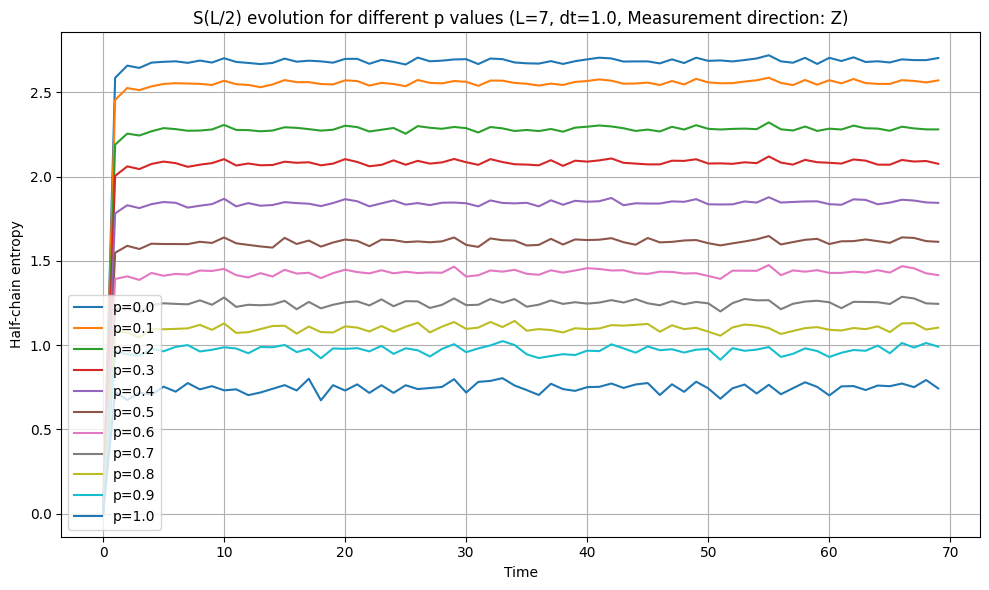

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_7"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=7, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

<>:38: SyntaxWarning: invalid escape sequence '\d'
<>:38: SyntaxWarning: invalid escape sequence '\d'
/var/folders/jf/m7m4d3dj54zgrgl_hgdy76g00000gn/T/ipykernel_71149/2100876519.py:38: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\delta \mathcal{Q}^2$')         # or Y-axis meaning


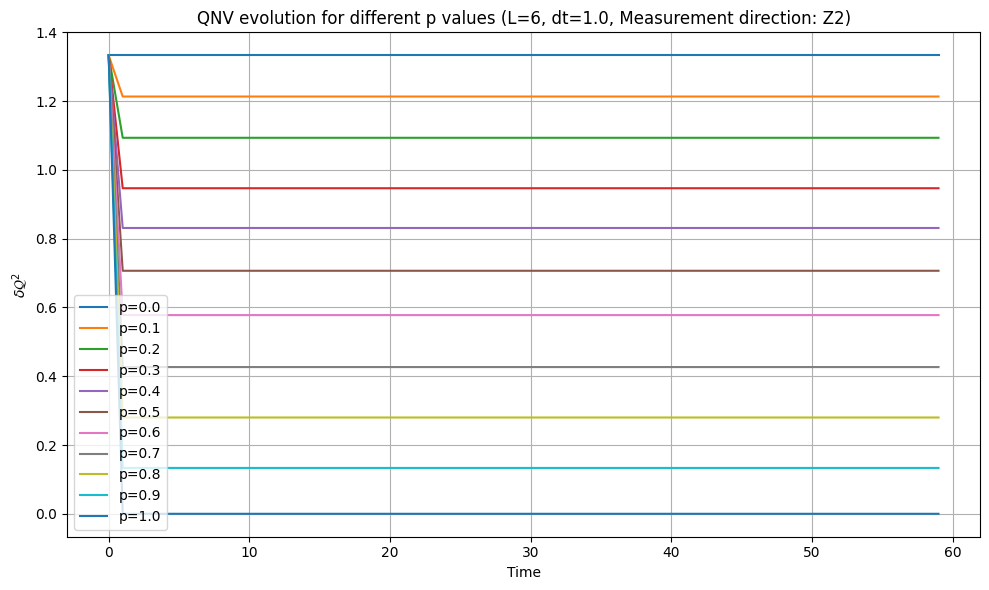

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_qnv/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_qnv)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('$\delta \mathcal{Q}^2$')         # or Y-axis meaning
plt.title('QNV evolution for different p values (L=6, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

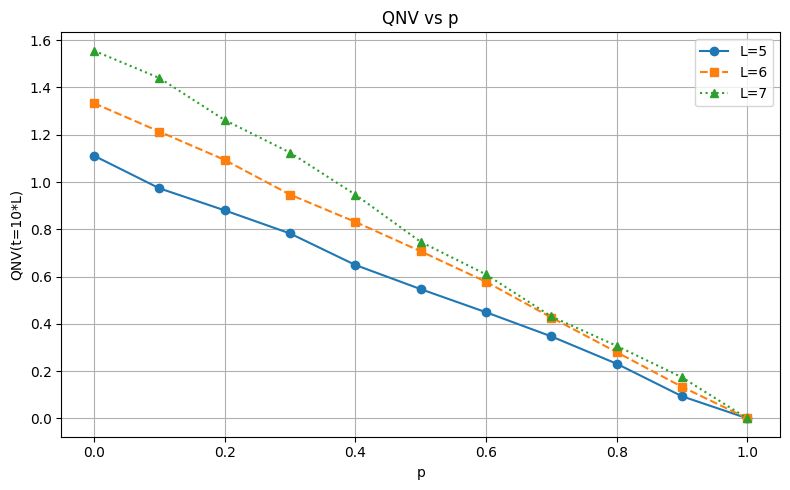

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [5, 6, 7]  # You can add more Ls here
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_qnv'
filename_template = 'timeT_points_L{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('QNV vs p')
plt.xlabel('p')
plt.ylabel('QNV(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig('S_hc_T10L_vs_p_s3.svg')
# plt.savefig('I3T_p_Z.png')

In [31]:
import os
import re
import numpy as np
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 1e-6   # <-- change this as needed

# Data structure: dict[(L, p)] = count
results = defaultdict(int)
totals = defaultdict(int)

# Regex to extract L, p, s from filename
# Example filename: L5,T50.0,dt1.0,p0.0,dirZ,s1_Qnv.npy
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_Qnv\.npy")

for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            s = int(match.group(3))  # not strictly needed except for completeness

            fpath = os.path.join(root, fname)
            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Print summary
print(f"Tolerance = {tolerance}\n")
for (L, p) in sorted(totals.keys()):
    total = totals[(L, p)]
    good = results[(L, p)]
    print(f"L={L}, p={p:.2f} -> {good}/{total} files below tolerance")


Tolerance = 1e-06

L=5, p=0.00 -> 0/50 files below tolerance
L=5, p=0.10 -> 0/50 files below tolerance
L=5, p=0.20 -> 0/50 files below tolerance
L=5, p=0.30 -> 0/50 files below tolerance
L=5, p=0.40 -> 3/50 files below tolerance
L=5, p=0.50 -> 4/50 files below tolerance
L=5, p=0.60 -> 7/50 files below tolerance
L=5, p=0.70 -> 10/50 files below tolerance
L=5, p=0.80 -> 19/50 files below tolerance
L=5, p=0.90 -> 33/50 files below tolerance
L=5, p=1.00 -> 50/50 files below tolerance
L=6, p=0.00 -> 0/50 files below tolerance
L=6, p=0.10 -> 0/50 files below tolerance
L=6, p=0.20 -> 0/50 files below tolerance
L=6, p=0.30 -> 0/50 files below tolerance
L=6, p=0.40 -> 0/50 files below tolerance
L=6, p=0.50 -> 0/50 files below tolerance
L=6, p=0.60 -> 3/50 files below tolerance
L=6, p=0.70 -> 8/50 files below tolerance
L=6, p=0.80 -> 17/50 files below tolerance
L=6, p=0.90 -> 28/50 files below tolerance
L=6, p=1.00 -> 50/50 files below tolerance
L=7, p=0.00 -> 0/50 files below tolerance
L=7, p=0

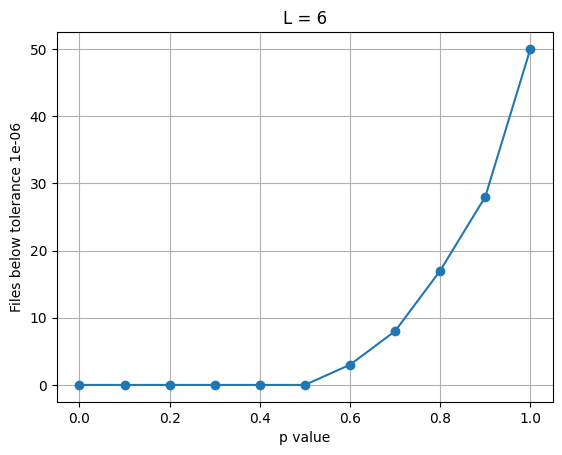

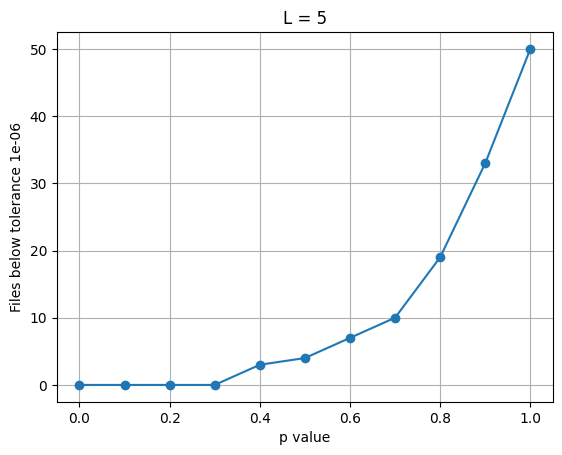

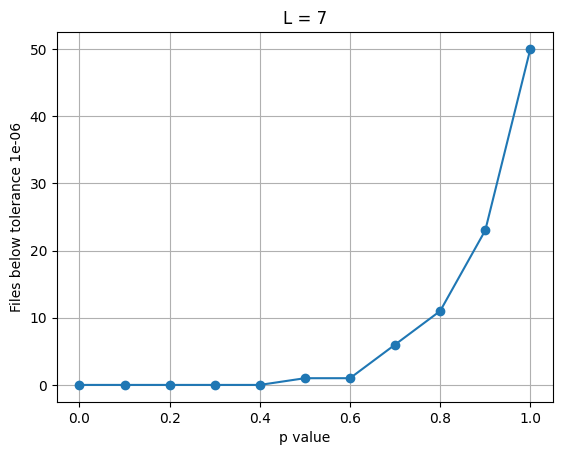

In [32]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 1e-6   # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_Qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    data_by_L[L].append((p, count_below))

# Plot for each L
for L, values in data_by_L.items():
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    counts = [count for _, count in values]

    plt.figure()
    plt.plot(ps, counts, marker="o")
    plt.xlabel("p value")
    plt.ylabel(f"Files below tolerance {tolerance}")
    plt.title(f"L = {L}")
    plt.grid(True)
    plt.show()


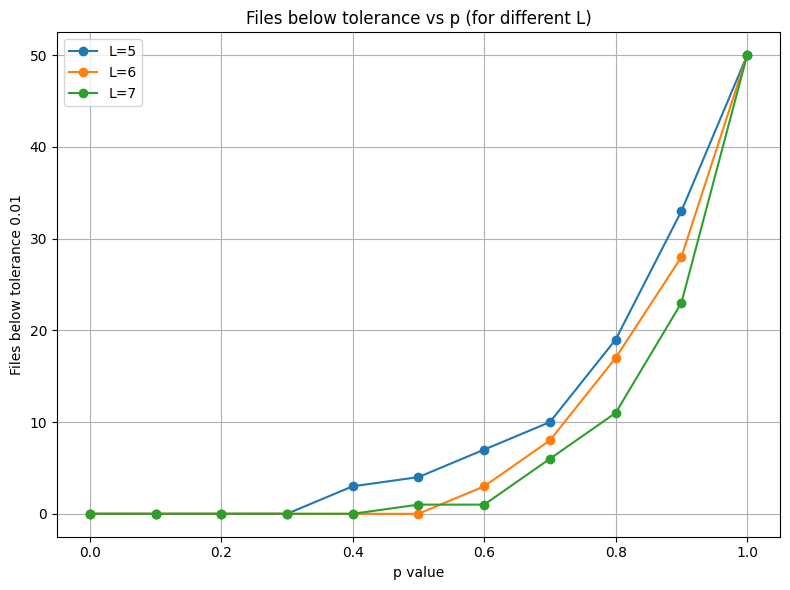

In [34]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 1e-2   # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_Qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    data_by_L[L].append((p, count_below))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    counts = [count for _, count in values]
    plt.plot(ps, counts, marker="o", label=f"L={L}")

plt.xlabel("p value")
plt.ylabel(f"Files below tolerance {tolerance}")
plt.title("Files below tolerance vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


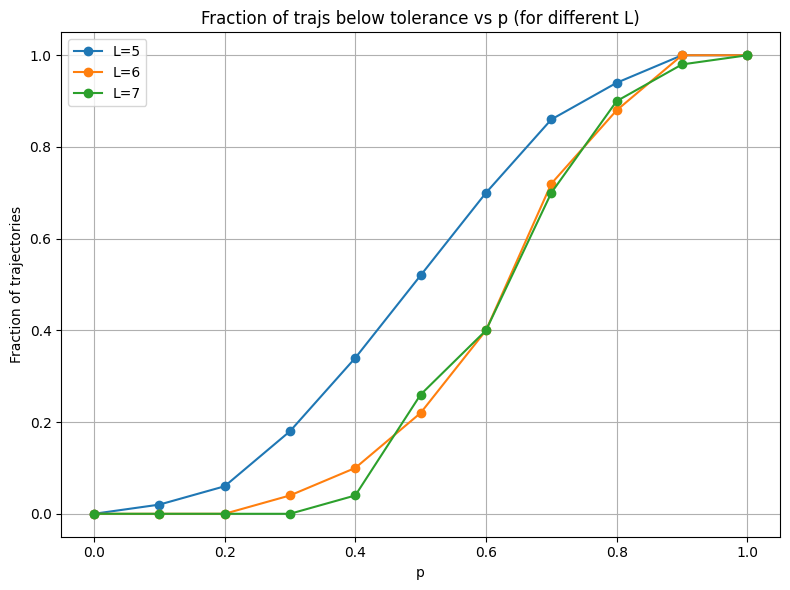

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 0.5   # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_Qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    total = totals[(L, p)]
    fraction = count_below / total if total > 0 else 0.0
    data_by_L[L].append((p, fraction))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    fracs = [frac for _, frac in values]
    plt.plot(ps, fracs, marker="o", label=f"L={L}")

plt.xlabel("p")
plt.ylabel(f"Fraction of trajectories")
plt.title("Fraction of trajs below tolerance vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### This is for 500 shots

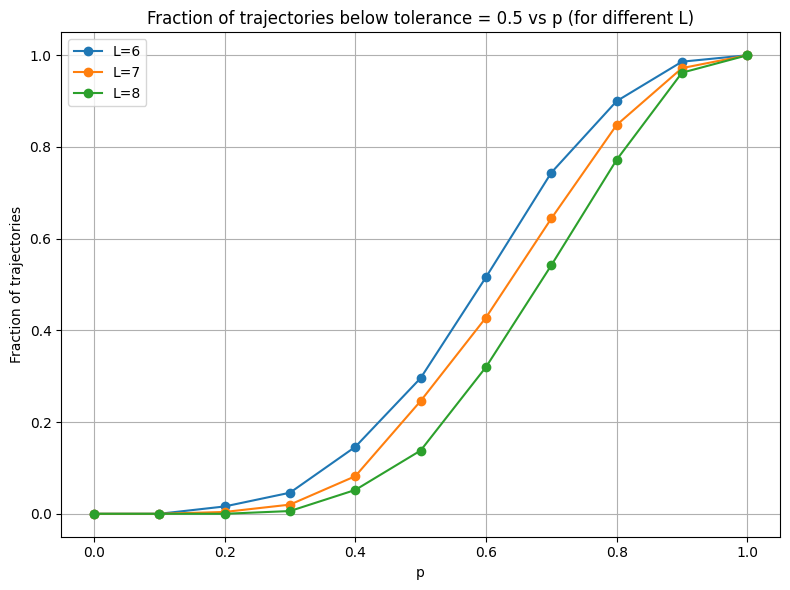

In [8]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 0.5  # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    total = totals[(L, p)]
    fraction = count_below / total if total > 0 else 0.0
    data_by_L[L].append((p, fraction))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    fracs = [frac for _, frac in values]
    plt.plot(ps, fracs, marker="o", label=f"L={L}")

plt.xlabel("p")
plt.ylabel("Fraction of trajectories")
plt.title(f"Fraction of trajectories below tolerance = {tolerance} vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


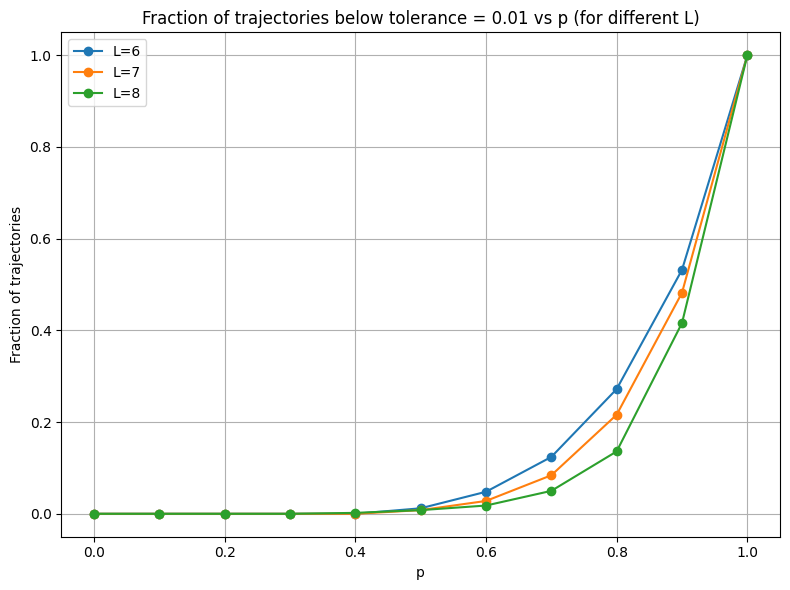

In [11]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv"

# Set tolerance
tolerance = 1e-2  # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    total = totals[(L, p)]
    fraction = count_below / total if total > 0 else 0.0
    data_by_L[L].append((p, fraction))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    fracs = [frac for _, frac in values]
    plt.plot(ps, fracs, marker="o", label=f"L={L}")

plt.xlabel("p")
plt.ylabel("Fraction of trajectories")
plt.title(f"Fraction of trajectories below tolerance = {tolerance} vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

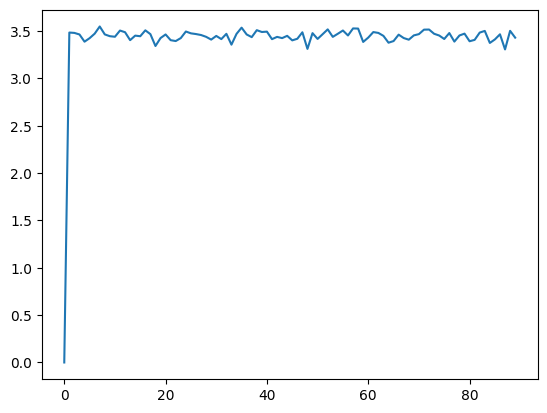

In [5]:
data = np.load("/Users/uditvarma/Documents/s3/L9,T90.0,dt1.0,p0.0,dirZ2,s1234_hc.npy")
plt.plot(data)

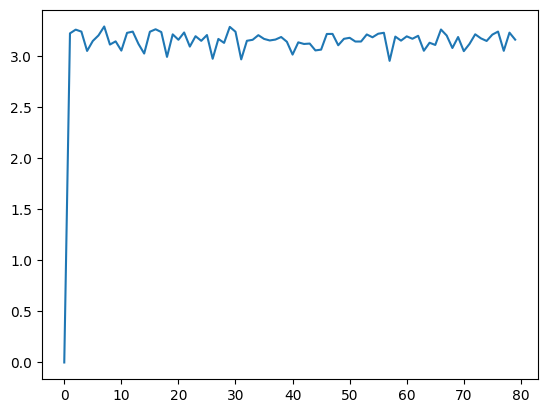

In [6]:
data = np.load("/Users/uditvarma/Documents/s3/L8,T80.0,dt1.0,p0.0,dirZ2,s1234_hc.npy")
plt.plot(data)

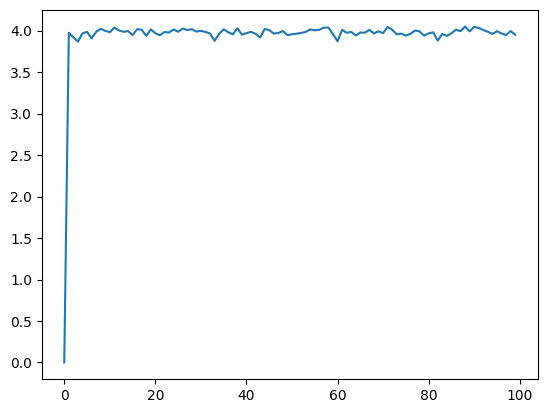

In [7]:
data = np.load("/Users/uditvarma/Documents/s3/L10,T100.0,dt1.0,p0.0,dirZ2,s1234_hc.npy")
plt.plot(data)

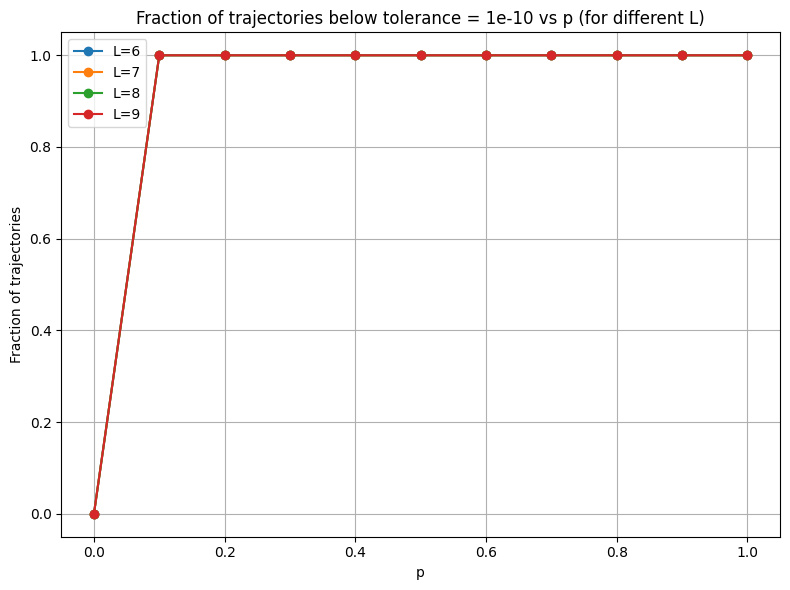

In [6]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnv_p"

# Set tolerance
tolerance = 1e-10  # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    total = totals[(L, p)]
    fraction = count_below / total if total > 0 else 0.0
    data_by_L[L].append((p, fraction))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    fracs = [frac for _, frac in values]
    plt.plot(ps, fracs, marker="o", label=f"L={L}")

plt.xlabel("p")
plt.ylabel("Fraction of trajectories")
plt.title(f"Fraction of trajectories below tolerance = {tolerance} vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

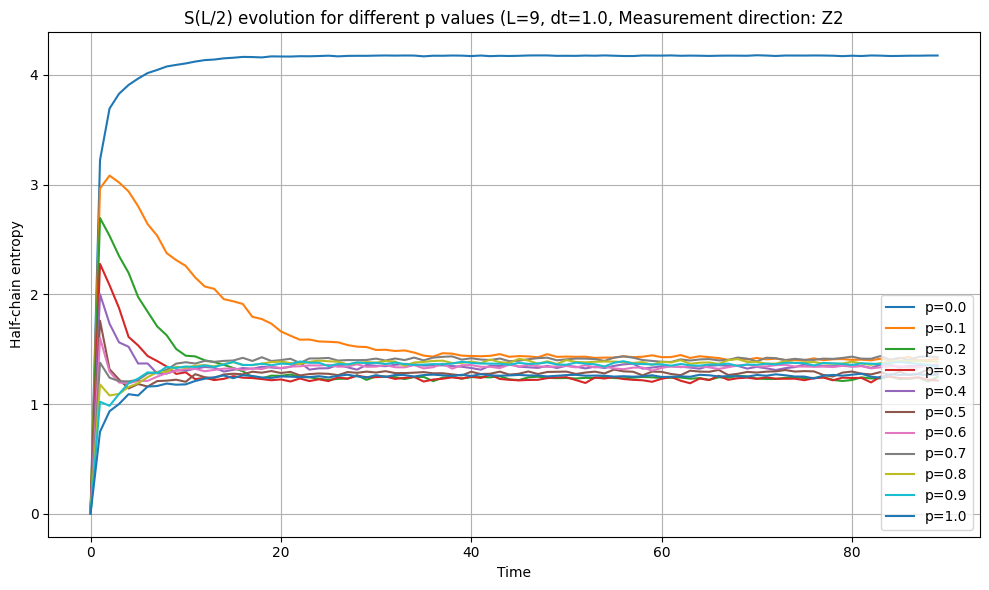

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc_p/L_9"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=9, dt=1.0, Measurement direction: Z2')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

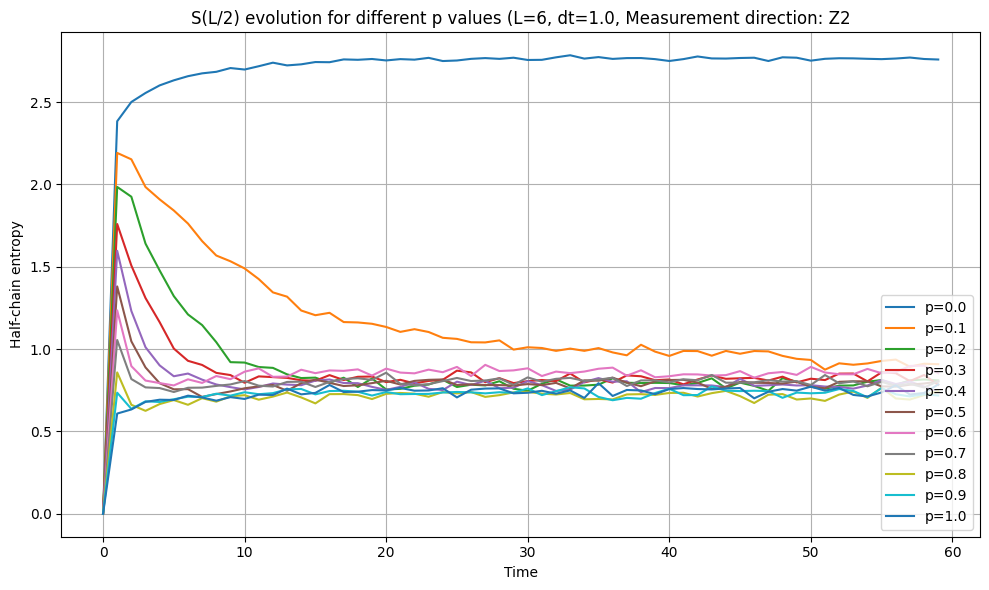

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc_p/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=6, dt=1.0, Measurement direction: Z2')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

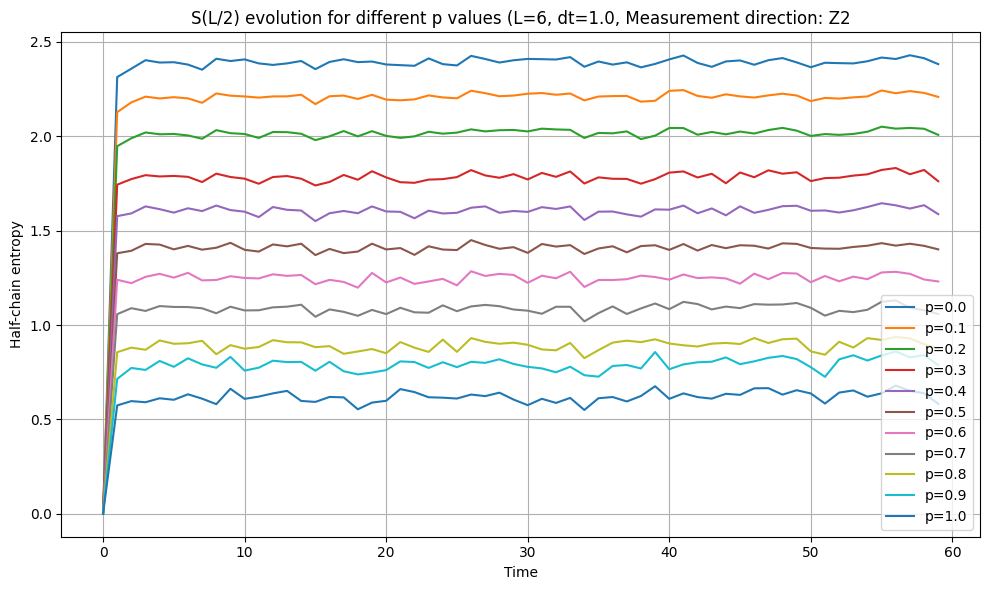

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hc/L_6"

# Regex pattern to extract 'p' from filenames like: 
# Emean_L5,T20,dt1.0,p0.1_anc.npy   or   Emean_L5,T300,dt1.0,p0.3.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all matching .npy files
filenames = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

# Extract (p_value, full_path) and sort by p
file_info = []
for fname in filenames:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_path = os.path.join(data_dir, fname)
        file_info.append((p, full_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, filepath in file_info:
    data = np.load(filepath)
    plt.plot(data, label=f'p={p}')

plt.xlabel('Time')          # or X-axis meaning
plt.ylabel('Half-chain entropy')         # or Y-axis meaning
plt.title('S(L/2) evolution for different p values (L=6, dt=1.0, Measurement direction: Z2')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig('S_hc_8_vs_t12L_z.svg')
plt.show()

## Code comparison

In [31]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc_p/Emean_L6,T60.0,dt1.0,p0.0_hc.npy")

In [37]:
data

array([6.66133815e-16, 2.38359084e+00, 2.50058548e+00, 2.55523871e+00,
       2.60139184e+00, 2.63209491e+00, 2.65720842e+00, 2.67441806e+00,
       2.68379267e+00, 2.70661375e+00, 2.69766333e+00, 2.71772844e+00,
       2.73922023e+00, 2.72268253e+00, 2.72921573e+00, 2.74306629e+00,
       2.74206822e+00, 2.75912598e+00, 2.75673431e+00, 2.76162753e+00,
       2.75279429e+00, 2.76085872e+00, 2.75757485e+00, 2.76853948e+00,
       2.74920296e+00, 2.75247405e+00, 2.76250591e+00, 2.76710470e+00,
       2.76240677e+00, 2.76939653e+00, 2.75566121e+00, 2.75654640e+00,
       2.77166883e+00, 2.78428203e+00, 2.76398278e+00, 2.77318748e+00,
       2.76216763e+00, 2.76709741e+00, 2.76742513e+00, 2.76076925e+00,
       2.74952173e+00, 2.76088103e+00, 2.77693540e+00, 2.76505352e+00,
       2.76421337e+00, 2.76767822e+00, 2.76933510e+00, 2.74943934e+00,
       2.77193812e+00, 2.76937768e+00, 2.75151642e+00, 2.76273757e+00,
       2.76619065e+00, 2.76540852e+00, 2.76275541e+00, 2.76071730e+00,
      

In [39]:
data1

array([6.66133815e-16, 2.31368501e+00, 2.35800461e+00, 2.40294524e+00,
       2.39049927e+00, 2.39223399e+00, 2.37970194e+00, 2.35260494e+00,
       2.41075274e+00, 2.39860657e+00, 2.40716281e+00, 2.38601231e+00,
       2.37795504e+00, 2.38596175e+00, 2.39876038e+00, 2.35551964e+00,
       2.39370588e+00, 2.40796024e+00, 2.39270818e+00, 2.39585371e+00,
       2.38018131e+00, 2.37673220e+00, 2.37326748e+00, 2.41241274e+00,
       2.38208809e+00, 2.37507999e+00, 2.42588480e+00, 2.40925679e+00,
       2.39056081e+00, 2.40259187e+00, 2.40972792e+00, 2.40831728e+00,
       2.40660076e+00, 2.41918203e+00, 2.36832876e+00, 2.39601205e+00,
       2.37969544e+00, 2.39157512e+00, 2.36496283e+00, 2.38326860e+00,
       2.40707564e+00, 2.42772560e+00, 2.38846421e+00, 2.36787191e+00,
       2.39639123e+00, 2.40162090e+00, 2.37874219e+00, 2.40285904e+00,
       2.41428485e+00, 2.39127249e+00, 2.36567564e+00, 2.38942273e+00,
       2.38733979e+00, 2.38585890e+00, 2.39734534e+00, 2.41705661e+00,
      

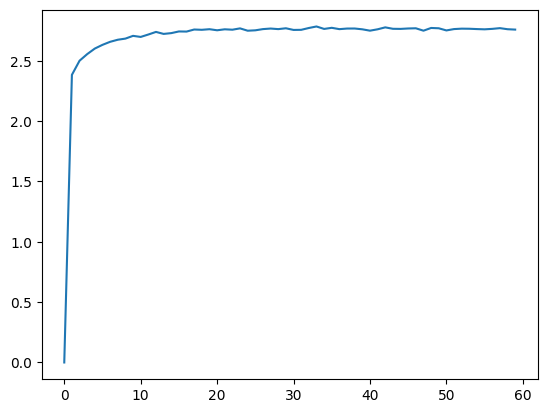

In [32]:
plt.plot(data)

In [35]:
data1 = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.0_hc.npy")

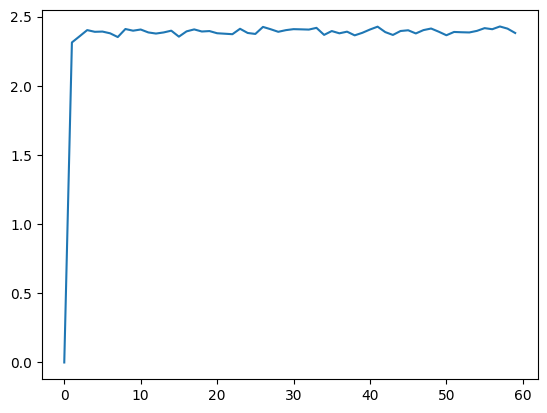

In [36]:
plt.plot(data1)

In [48]:
qdata = np.load("/Users/uditvarma/Documents/s3_data/mean_qnv/Emean_L6,T60.0,dt1.0,p0.0_qnv.npy")

In [49]:
qdata

array([1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333])

In [53]:
qdata_p = np.load("/Users/uditvarma/Documents/s3_data/mean_qnv_p/Emean_L6,T60.0,dt1.0,p0.0_qnv.npy")

In [54]:
qdata_p

array([1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333,
       1.33333333, 1.33333333, 1.33333333, 1.33333333, 1.33333333])

p = 0.3

In [79]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc_p/Emean_L6,T60.0,dt1.0,p0.3_hc.npy")

In [80]:
data

array([6.66133815e-16, 1.38084294e+00, 1.28798535e+00, 1.00111153e+00,
       8.78045584e-01, 7.60454615e-01, 5.77184314e-01, 6.12679490e-01,
       6.26239665e-01, 3.72782201e-01, 5.55123700e-01, 3.25156992e-01,
       5.66488459e-01, 3.52627754e-01, 5.25016234e-01, 5.79450496e-01,
       3.99624266e-01, 4.92089841e-01, 4.65033801e-01, 4.69330452e-01,
       4.16470390e-01, 5.63983781e-01, 2.09615827e-01, 6.30030737e-01,
       5.53086696e-01, 3.30540297e-01, 5.62254252e-01, 4.34354440e-01,
       4.47931700e-01, 4.81102541e-01, 5.12742178e-01, 3.24586581e-01,
       5.90969913e-01, 4.32335798e-01, 4.97116760e-01, 4.45106581e-01,
       4.71091517e-01, 6.23292450e-01, 2.40032295e-01, 5.79534257e-01,
       4.95585094e-01, 3.87109136e-01, 4.41846968e-01, 5.53699143e-01,
       3.16087704e-01, 5.94476653e-01, 6.18059357e-01, 1.82741680e-01,
       5.83981558e-01, 4.12374299e-01, 4.86391578e-01, 4.23820794e-01,
       5.06211337e-01, 4.14282830e-01, 5.67050792e-01, 4.95164686e-01,
      

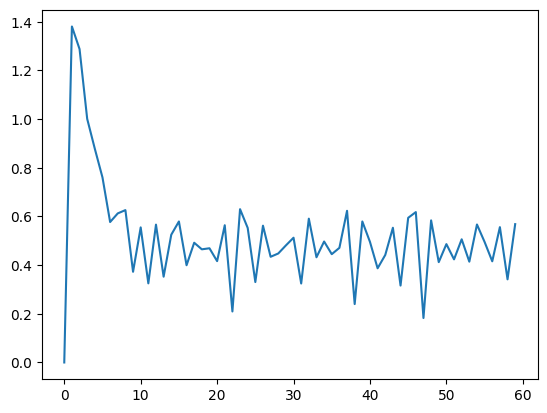

In [81]:
plt.plot(data)

In [74]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.3_hc.npy")

In [75]:
data

array([6.66133815e-16, 1.74354689e+00, 1.77315476e+00, 1.79385654e+00,
       1.78702714e+00, 1.78983925e+00, 1.78500906e+00, 1.75741395e+00,
       1.80186152e+00, 1.78415540e+00, 1.77526409e+00, 1.74842192e+00,
       1.78403580e+00, 1.78926398e+00, 1.77502620e+00, 1.73938248e+00,
       1.75791006e+00, 1.79495521e+00, 1.76963401e+00, 1.81475468e+00,
       1.78194114e+00, 1.75666144e+00, 1.75334345e+00, 1.77038492e+00,
       1.77290755e+00, 1.78365926e+00, 1.82075359e+00, 1.79238869e+00,
       1.78014336e+00, 1.79925514e+00, 1.77108155e+00, 1.80582137e+00,
       1.78506238e+00, 1.81354718e+00, 1.74968544e+00, 1.78224070e+00,
       1.77480506e+00, 1.77401482e+00, 1.74879676e+00, 1.77289164e+00,
       1.80734522e+00, 1.81362837e+00, 1.78152391e+00, 1.80124256e+00,
       1.75109106e+00, 1.80803399e+00, 1.78289566e+00, 1.81961407e+00,
       1.80168490e+00, 1.80914306e+00, 1.76249850e+00, 1.77839694e+00,
       1.78047492e+00, 1.79152234e+00, 1.79836661e+00, 1.82149890e+00,
      

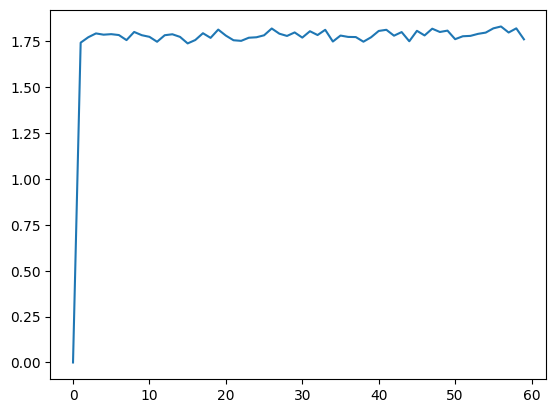

In [76]:
plt.plot(data)

s3.jl

with broadcasting

In [84]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hc/Emean_L6,T60.0,dt1.0,p0.3_hc.npy")

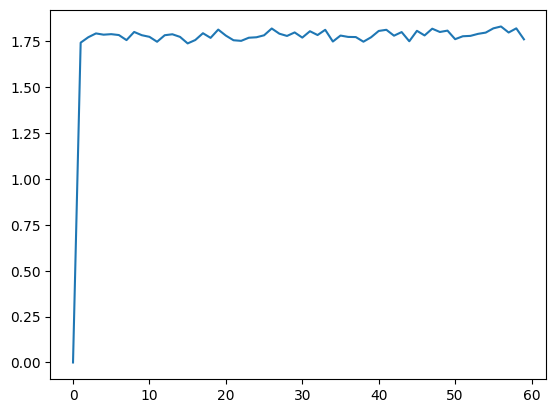

In [85]:
plt.plot(data)

### New data - Charge-sharpening (Sep 8)

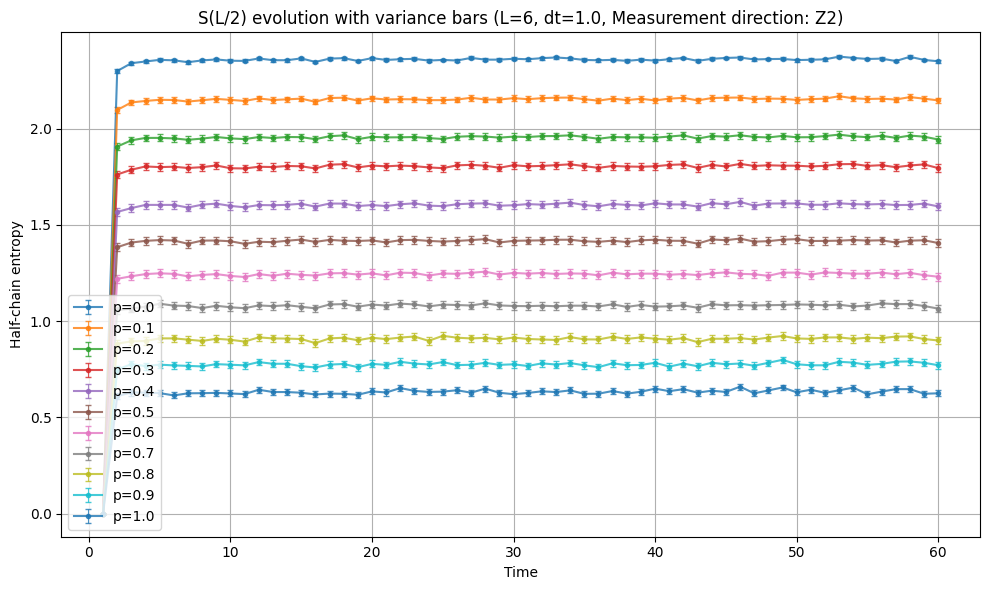

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcn/L_6"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L6")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=6, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_6_vs_t_Z2.svg')
plt.show()

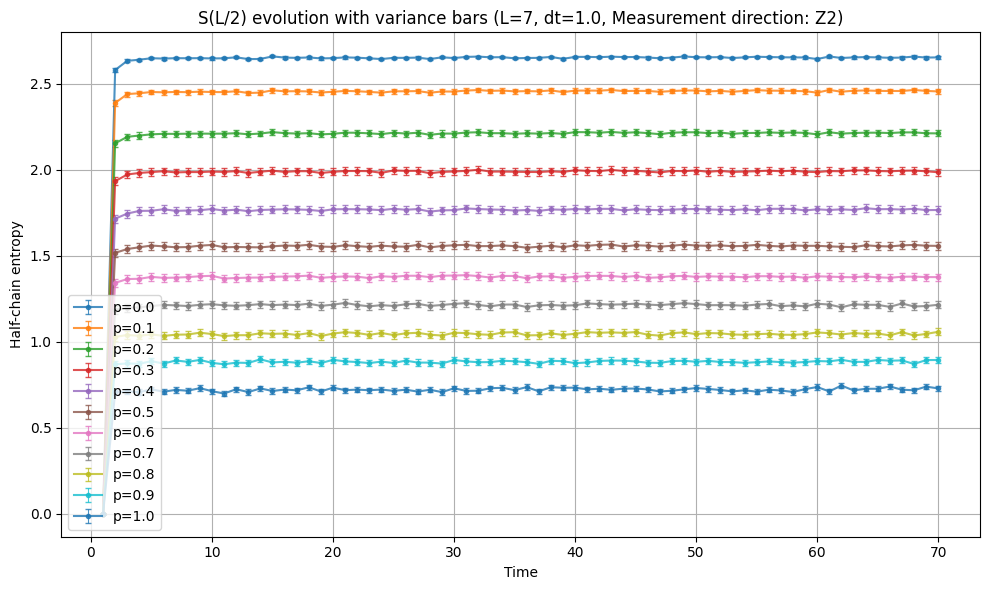

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcn/L_7"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L7")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=7, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_7_vs_t_Z2.svg')
plt.show()

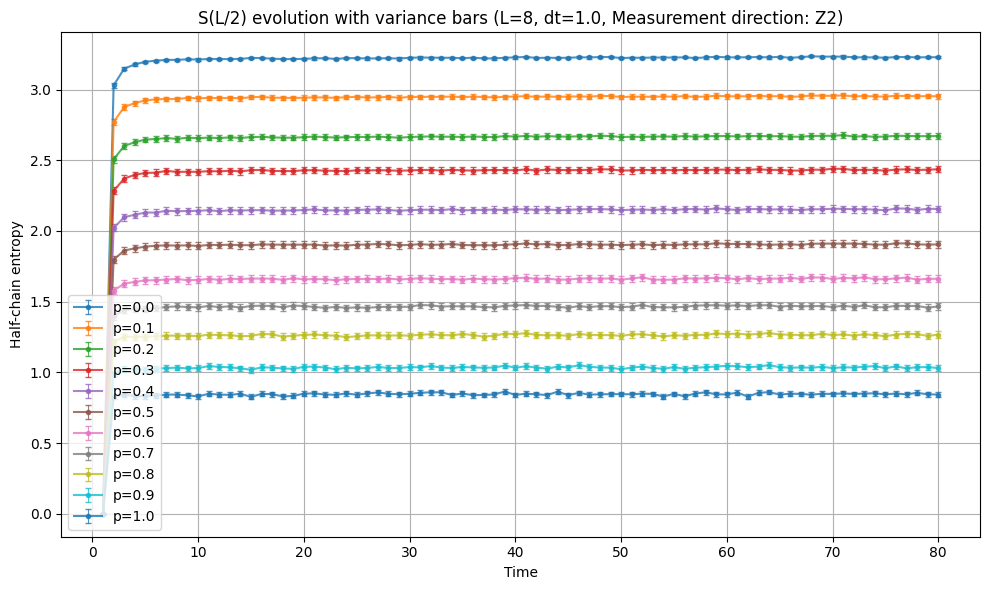

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_8_vs_t_Z2.svg')
plt.show()

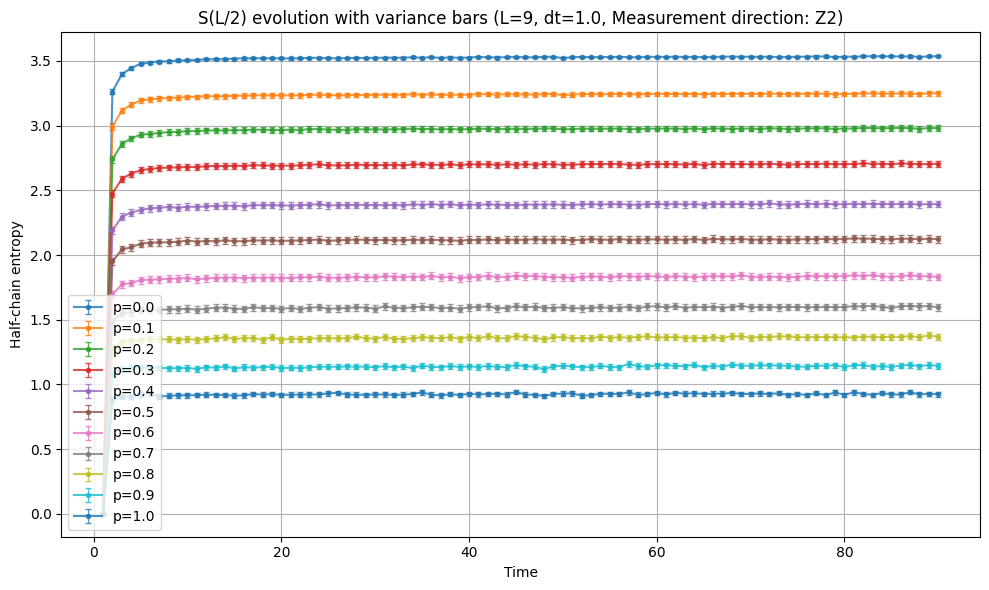

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcn/L_9"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L9")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=9, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig('S_hc_9_vs_t_Z2.svg')
plt.show()

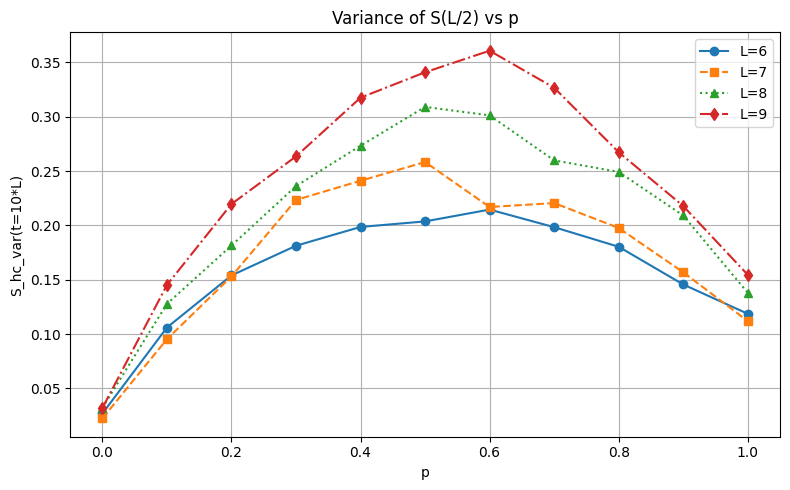

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parameters
L_list = [6, 7, 8, 9]  # You can add more Ls here
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
base_path = '/Users/uditvarma/Documents/s3_data/mean_hcn'
filename_template = 'timeT_points_L_var{}.npy'

# Plot setup
plt.figure(figsize=(8, 5))
linestyles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'd']

for idx, L in enumerate(L_list):
    file_path = os.path.join(base_path, filename_template.format(L))
    data = np.load(file_path)
    plt.plot(x[:len(data)], data,  # Use x values sliced to match data length
             marker=markers[idx % len(markers)],
             linestyle=linestyles[idx % len(linestyles)],
             label=f'L={L}')

# Labels and saving
plt.title('Variance of S(L/2) vs p')
plt.xlabel('p')
plt.ylabel('S_hc_var(t=10*L)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('S_hc_var_T10L_vs_p_Z2.svg')
# plt.savefig('I3T_p_Z.png')

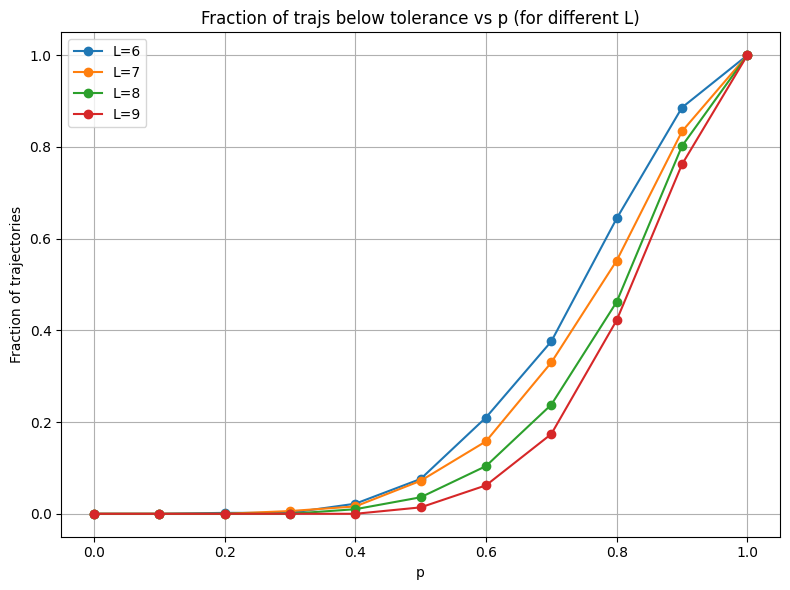

In [41]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnvn"

# Set tolerance
tolerance = 0.25   # <-- change this as needed

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    count_below = results[(L, p)]
    total = totals[(L, p)]
    fraction = count_below / total if total > 0 else 0.0
    data_by_L[L].append((p, fraction))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    fracs = [frac for _, frac in values]
    plt.plot(ps, fracs, marker="o", label=f"L={L}")

plt.xlabel("p")
plt.ylabel(f"Fraction of trajectories")
plt.title("Fraction of trajs below tolerance vs p (for different L)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcn/L_8/Emean_L8,T80.0,dt1.0,p1.0_hc.npy")
data

array([-4.44089210e-16,  8.26406173e-01,  8.43364354e-01,  8.31386782e-01,
        8.31329629e-01,  8.36387456e-01,  8.42726174e-01,  8.43458033e-01,
        8.37773225e-01,  8.30121296e-01,  8.48746327e-01,  8.42671830e-01,
        8.41411422e-01,  8.48473400e-01,  8.26924282e-01,  8.48139319e-01,
        8.45995200e-01,  8.29961009e-01,  8.33343896e-01,  8.49707689e-01,
        8.51691034e-01,  8.43527529e-01,  8.41518582e-01,  8.51061443e-01,
        8.42452600e-01,  8.51639185e-01,  8.57916670e-01,  8.48928436e-01,
        8.45151161e-01,  8.48870544e-01,  8.55437279e-01,  8.59140458e-01,
        8.59031165e-01,  8.40118411e-01,  8.50682692e-01,  8.38659632e-01,
        8.40210004e-01,  8.44089142e-01,  8.64523239e-01,  8.40427581e-01,
        8.49165712e-01,  8.45244178e-01,  8.39575155e-01,  8.63521633e-01,
        8.38985057e-01,  8.55007364e-01,  8.42622471e-01,  8.44985089e-01,
        8.46098206e-01,  8.46326789e-01,  8.45140642e-01,  8.50050722e-01,
        8.47438926e-01,  

In [29]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcn/L_7/Emean_L7,T70.0,dt1.0,p1.0_hc.npy")
data

array([-4.44089210e-16,  7.05217164e-01,  7.12151017e-01,  7.06920820e-01,
        7.23793275e-01,  7.09634908e-01,  7.20491541e-01,  7.15457174e-01,
        7.30456357e-01,  7.12916786e-01,  6.99227925e-01,  7.24340230e-01,
        7.07616028e-01,  7.28892316e-01,  7.13853665e-01,  7.22488912e-01,
        7.17788702e-01,  7.35443208e-01,  7.11041836e-01,  7.33512471e-01,
        7.18474399e-01,  7.22008025e-01,  7.18250355e-01,  7.22433127e-01,
        7.14545387e-01,  7.21591102e-01,  7.10597430e-01,  7.21214783e-01,
        7.07492981e-01,  7.29871368e-01,  7.14411543e-01,  7.15495753e-01,
        7.30057248e-01,  7.32402125e-01,  7.18898791e-01,  7.36583950e-01,
        7.11977152e-01,  7.35803625e-01,  7.32744000e-01,  7.33285890e-01,
        7.23413566e-01,  7.27065810e-01,  7.20860413e-01,  7.27624874e-01,
        7.28080200e-01,  7.23193109e-01,  7.11213683e-01,  7.15508205e-01,
        7.23346531e-01,  7.31351734e-01,  7.25839521e-01,  7.19777935e-01,
        7.11509060e-01,  

## Circuit results

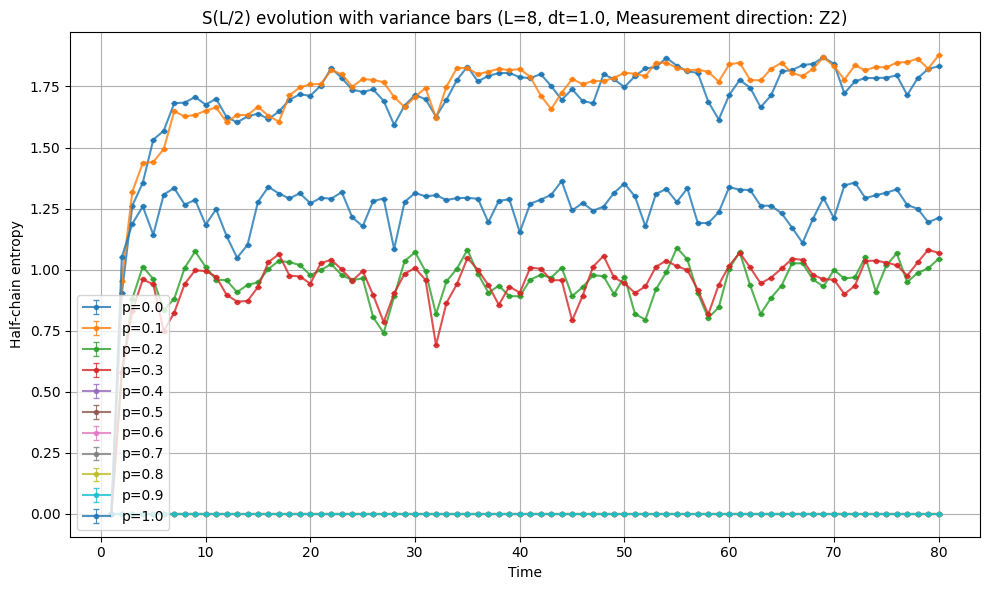

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcr/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

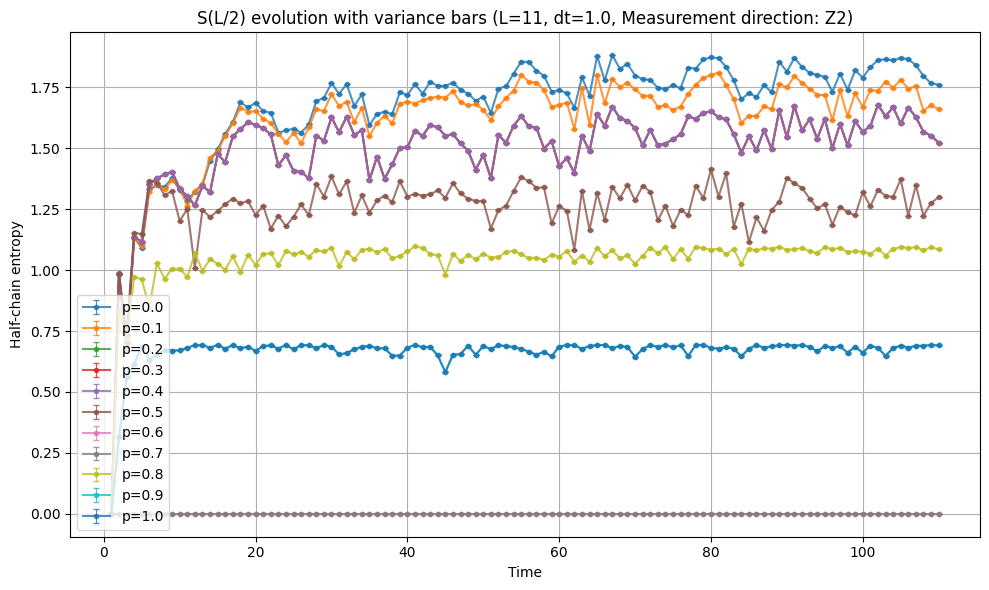

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcr/L_11"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L11")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=11, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_11_vs_t_Z2.svg")
plt.show()

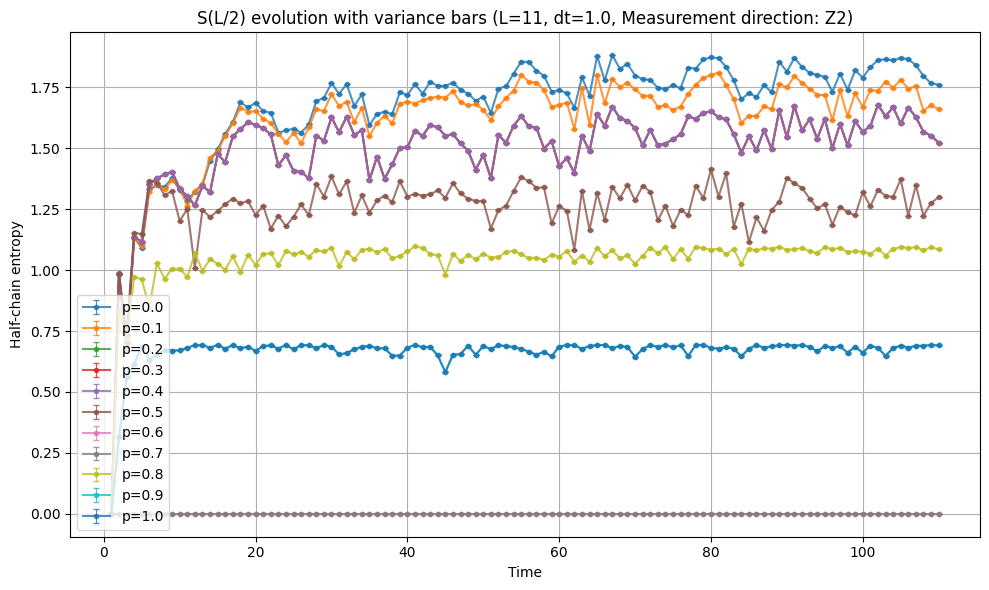

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcr/L_11"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L11")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

file_info.sort()

# Get color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

plt.figure(figsize=(10, 6))
for idx, (p, mean_path, var_path) in enumerate(file_info):
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)

    t = np.arange(len(mean))

    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,
        elinewidth=0.8,
        markersize=3,
        fmt='-o',
        alpha=0.8,
        color=colors[idx % len(colors)]  # cycle through colors
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=11, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_11_vs_t_Z2.svg")
plt.show()


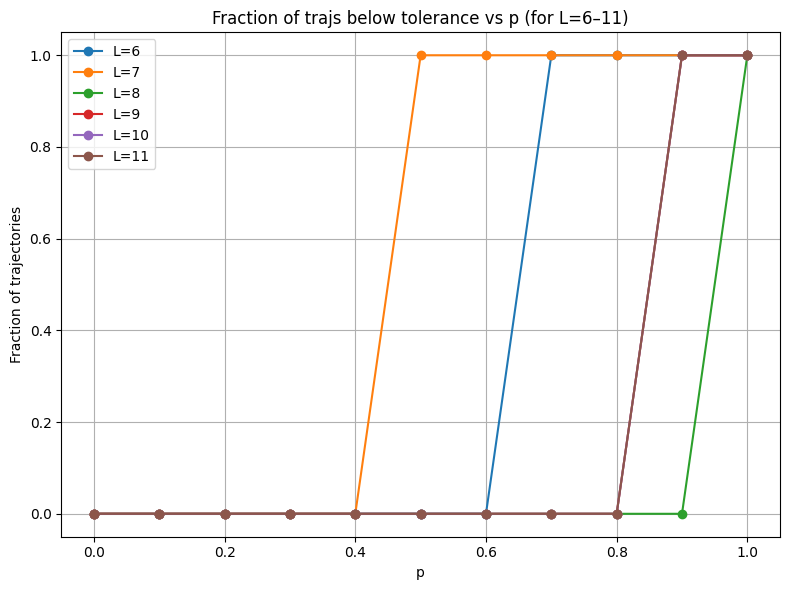

In [10]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Folder containing your .npy files
base_dir = "/Users/uditvarma/Documents/s3_data/data_qnvr"

# Set tolerance
tolerance = 0.25   # <-- change this as needed

# Allowed system sizes
allowed_L = {6, 7, 8, 9, 10, 11}

# Data structures
results = defaultdict(int)   # (L, p) -> count below tolerance
totals = defaultdict(int)    # (L, p) -> total files

# Regex to extract L, p, s from filename
pattern = re.compile(r"L(\d+).*p([\d.]+).*s(\d+)_qnv\.npy")

# Process files
for root, _, files in os.walk(base_dir):
    for fname in files:
        if fname.endswith(".npy"):
            match = pattern.search(fname)
            if not match:
                continue
            L = int(match.group(1))
            if L not in allowed_L:  # filter L
                continue
            p = float(match.group(2))
            fpath = os.path.join(root, fname)

            try:
                data = np.load(fpath)
                last_val = data[-1]
                totals[(L, p)] += 1
                if last_val < tolerance:
                    results[(L, p)] += 1
            except Exception as e:
                print(f"Error loading {fpath}: {e}")

# Organize results per L
data_by_L = defaultdict(list)
for (L, p) in totals.keys():
    if L in allowed_L:  # ensure only selected L
        count_below = results[(L, p)]
        total = totals[(L, p)]
        fraction = count_below / total if total > 0 else 0.0
        data_by_L[L].append((p, fraction))

# Plot all L curves on one figure
plt.figure(figsize=(8, 6))
for L, values in sorted(data_by_L.items()):
    values.sort(key=lambda x: x[0])  # sort by p
    ps = [p for p, _ in values]
    fracs = [frac for _, frac in values]
    plt.plot(ps, fracs, marker="o", label=f"L={L}")

plt.xlabel("p")
plt.ylabel(f"Fraction of trajectories")
plt.title("Fraction of trajs below tolerance vs p (for L=6–11)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

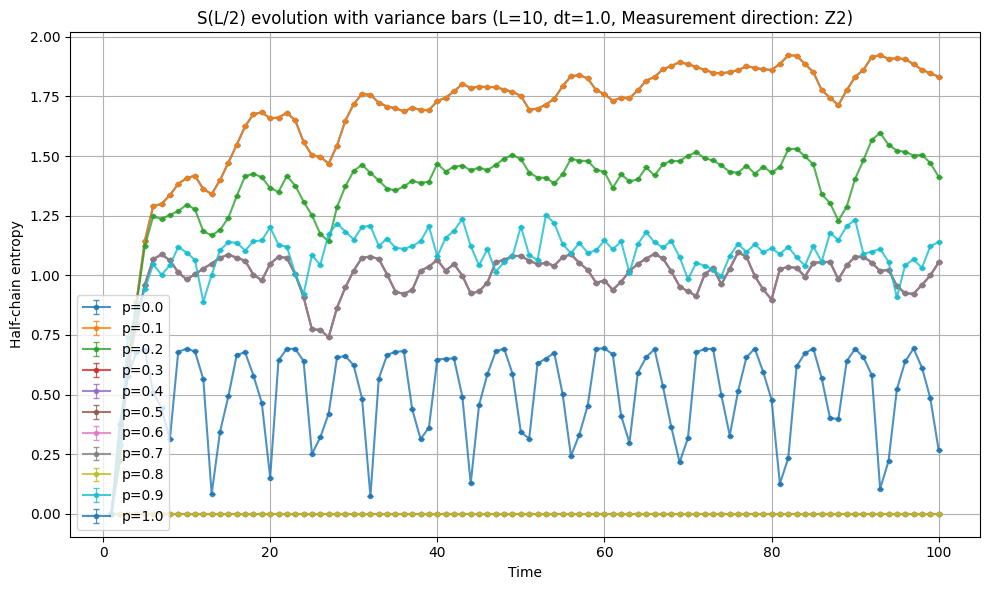

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcr/L_10"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L10")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=10, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_10_vs_t_Z2.svg")
plt.show()

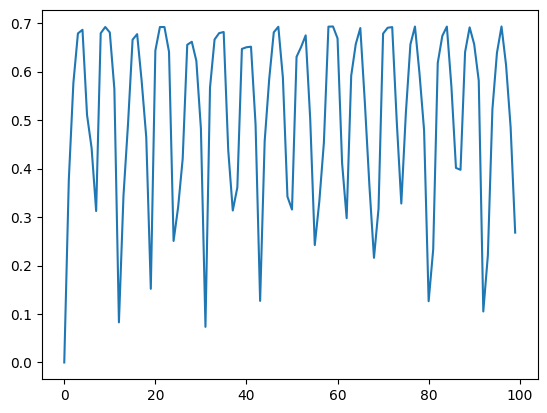

In [16]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcr/L_10/Emean_L10,T100.0,dt1.0,p1.0_hc.npy")
plt.plot(data)

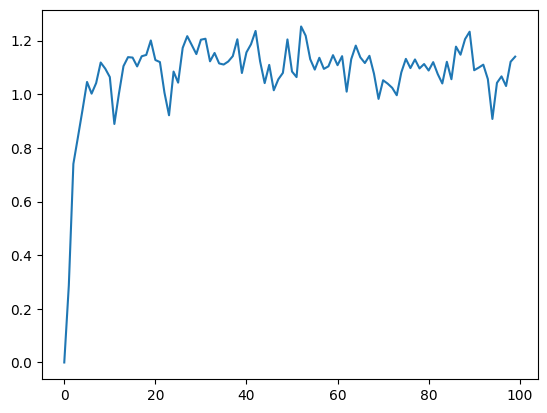

In [17]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcr/L_10/Emean_L10,T100.0,dt1.0,p0.9_hc.npy")
plt.plot(data)

In [18]:
data = np.load("/Users/uditvarma/Documents/s3_data/mean_hcr/L_10/Emean_L10,T100.0,dt1.0,p1.0_hc.npy")

In [19]:
data

array([2.44249065e-15, 3.77396221e-01, 5.76483924e-01, 6.78814549e-01,
       6.86310484e-01, 5.10582446e-01, 4.42495078e-01, 3.12394695e-01,
       6.79209941e-01, 6.92085335e-01, 6.80753717e-01, 5.64165058e-01,
       8.27631292e-02, 3.43879935e-01, 4.92520094e-01, 6.65883298e-01,
       6.77271203e-01, 5.79695745e-01, 4.64730575e-01, 1.51932184e-01,
       6.43411789e-01, 6.92036531e-01, 6.91926459e-01, 6.40720293e-01,
       2.50687767e-01, 3.20559788e-01, 4.20154441e-01, 6.55371404e-01,
       6.61593618e-01, 6.22195410e-01, 4.82484505e-01, 7.34902813e-02,
       5.67184611e-01, 6.66295177e-01, 6.79405425e-01, 6.81737274e-01,
       4.38019717e-01, 3.13489834e-01, 3.61206988e-01, 6.46824723e-01,
       6.50269844e-01, 6.51394949e-01, 4.91057036e-01, 1.27032089e-01,
       4.56358523e-01, 5.85064217e-01, 6.81095657e-01, 6.92570895e-01,
       5.87654329e-01, 3.42088457e-01, 3.15490933e-01, 6.30554494e-01,
       6.50817302e-01, 6.74789025e-01, 5.02083860e-01, 2.42173044e-01,
      

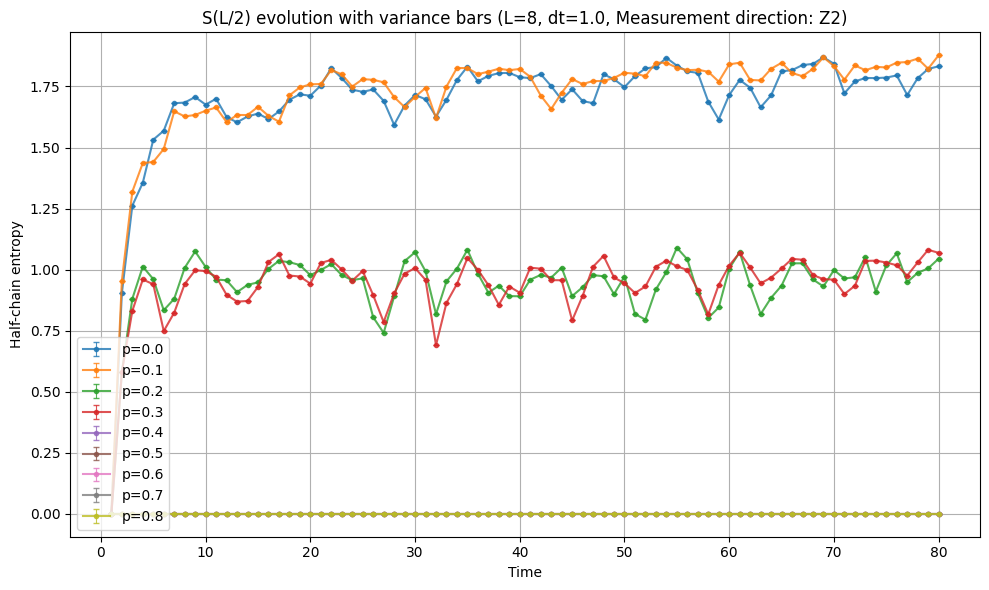

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcrn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

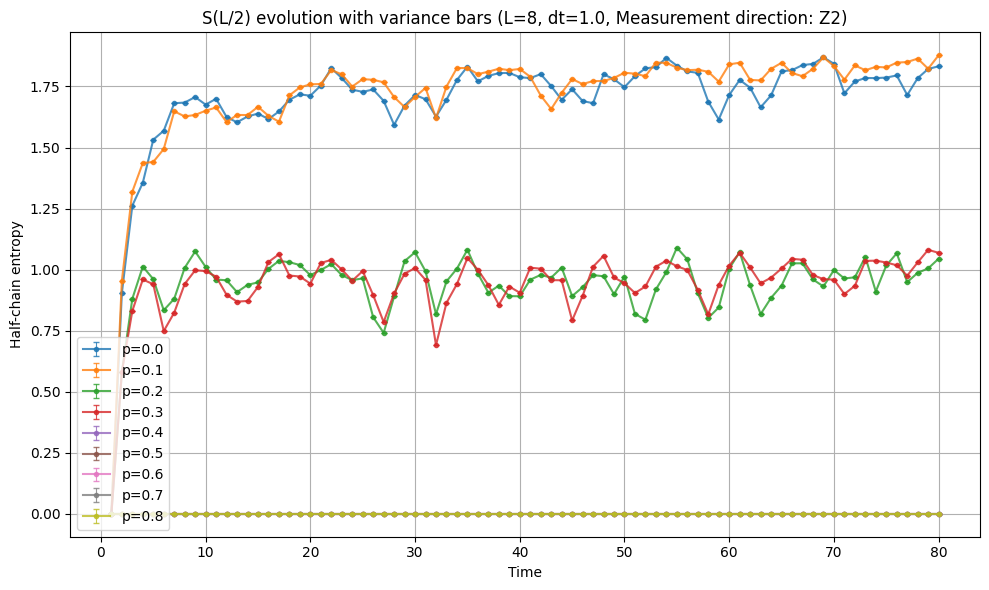

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcrn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

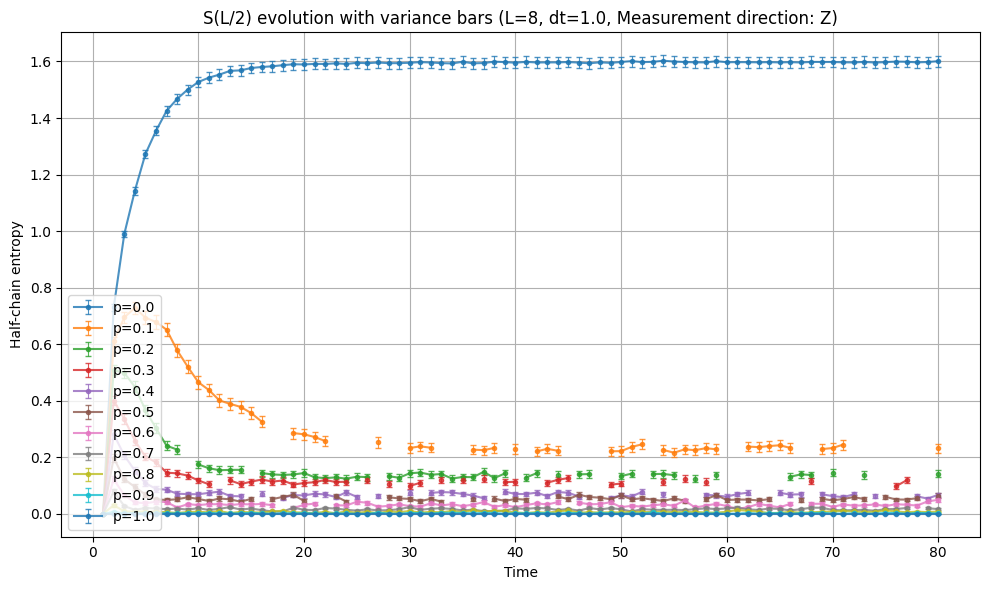

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcrn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

In [9]:
data= np.load("/Users/uditvarma/Documents/s3_data/mean_hcrn/L_8/Emean_L8,T80.0,dt1.0,p0.1_hc.npy")

In [10]:
data

array([-4.88498131e-17,  6.09587856e-01,  6.94723217e-01,  7.28235614e-01,
        6.93998213e-01,  6.78237777e-01,  6.51244841e-01,  5.78208396e-01,
        5.20308423e-01,  4.65455603e-01,  4.37862585e-01,  4.01001120e-01,
        3.88974240e-01,  3.78190219e-01,  3.56480311e-01,  3.25982649e-01,
                  -inf,            -inf,  2.85566985e-01,  2.81118585e-01,
        2.71658603e-01,  2.57390190e-01,            -inf,            -inf,
                  -inf,            -inf,  2.52254533e-01,            -inf,
                  -inf,  2.32881013e-01,  2.38515689e-01,  2.33731659e-01,
                  -inf,            -inf,            -inf,  2.26895950e-01,
        2.25067669e-01,  2.33041895e-01,            -inf,  2.29409407e-01,
                  -inf,  2.20497038e-01,  2.29846015e-01,  2.23035699e-01,
                  -inf,            -inf,            -inf,            -inf,
        2.21124495e-01,  2.21696427e-01,  2.36672613e-01,  2.45917895e-01,
                  -inf,  

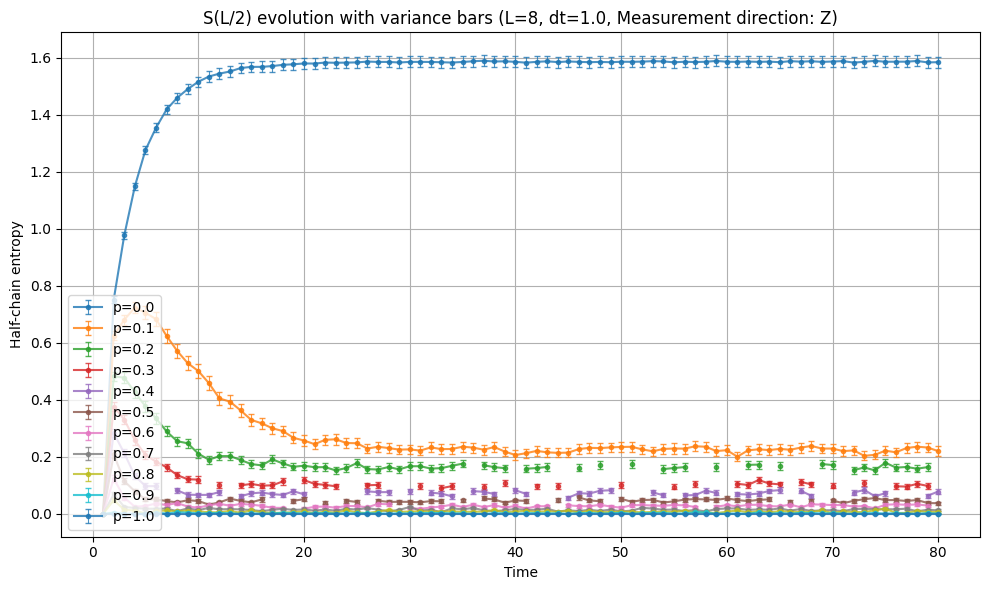

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcrn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

In [25]:
4 * np.log(3)/2

np.float64(2.1972245773362196)

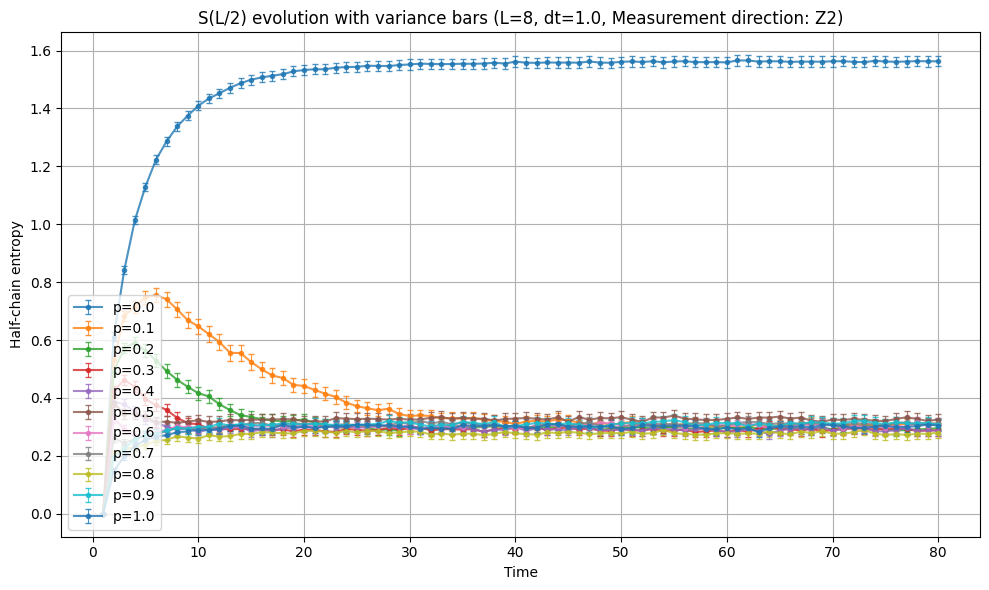

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcrn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

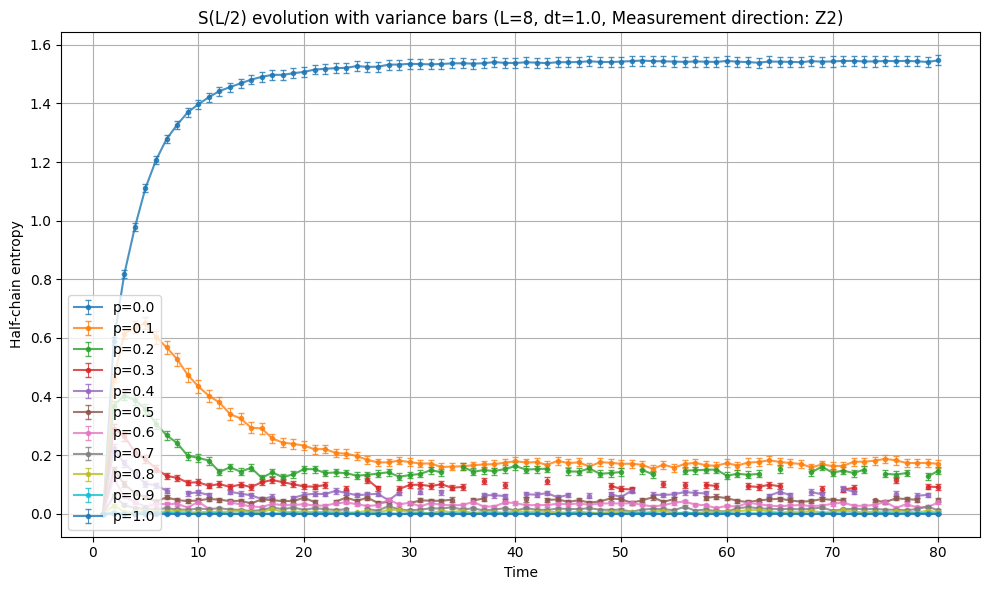

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcrn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()

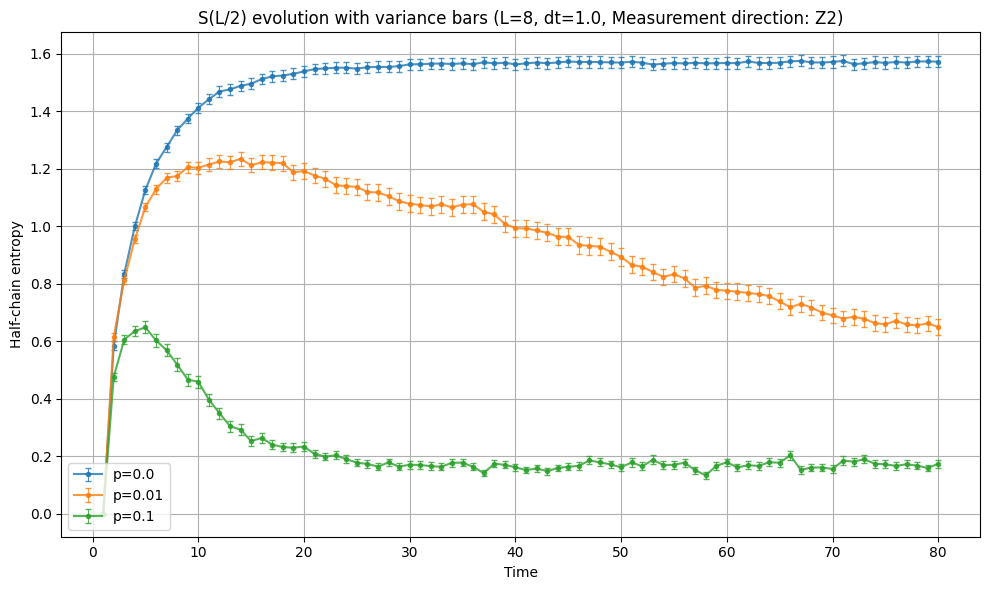

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

# Folder containing your .npy files
data_dir = "/Users/uditvarma/Documents/s3_data/mean_hcrn/L_8"
var_dir = os.path.join(data_dir, "var")

# Regex pattern to extract 'p' from filenames like: 
# Emean_L6,T60.0,dt1.0,p0.0_hc.npy
pattern = re.compile(r'p([0-9.]+)(?:_hc)?\.npy$')

# Get all mean files
mean_files = [
    fname for fname in os.listdir(data_dir)
    if fname.startswith("Emean_L8")
]

file_info = []
for fname in mean_files:
    match = pattern.search(fname)
    if match:
        p = float(match.group(1))
        full_mean_path = os.path.join(data_dir, fname)

        # construct matching variance filename (inside "var" folder)
        var_fname = fname.replace("Emean", "Evar")
        full_var_path = os.path.join(var_dir, var_fname)

        # only add if both files exist
        if os.path.exists(full_var_path):
            file_info.append((p, full_mean_path, full_var_path))

# Sort by p value
file_info.sort()

# Plotting
plt.figure(figsize=(10, 6))
for p, mean_path, var_path in file_info:
    mean = np.load(mean_path)
    var = np.load(var_path)
    std = np.sqrt(var) / np.sqrt(500)  # standard error

    t = np.arange(len(mean))  # time axis

    # plot with error bars
    plt.errorbar(
        t+1, mean, yerr=std,
        label=f'p={p}',
        capsize=2,  # small caps at ends of error bars
        elinewidth=0.8,
        markersize=3,
        fmt='-o',   # line with circle markers
        alpha=0.8
    )

plt.xlabel('Time')
plt.ylabel('Half-chain entropy')
plt.title('S(L/2) evolution with variance bars (L=8, dt=1.0, Measurement direction: Z2)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()

# Save plots
#plt.savefig("/Users/uditvarma/Documents/s3/plots/Circuit/S_hcr_8_vs_t_Z2.svg")
plt.show()